# Background

## Problem Statements
Perusahaan ingin meningkatkan **profitabilitas dengan menganalisa data penjualan dan transaksi pelanggan, fokus utama akan melihat data repeat order dan retantion, serta mengetahui potensi churn dari pelanggan**. Informasi ini akan membantu perusahaan untuk mengambil keputusan dalam 6 bulan ke depan, mulai dari strategi marketing, bisnis operational, hingga customer relationship management. 

Sebagai seorang *data analyst*, kita akan mencoba menjawab pertanyaan berikut:

**1. Bagaimana meningkatkan repeat order pelanggan dan mengantisipasi pelanggan yang tidak membeli produk**

**2. Strategi marketing yang seperti apa yang dapat meningkatkan value penjualan per transaksi dan repeat order pelanggan?**

**3. Bagaimana perusahaan dapat menurunkan biaya operational berdasarkan efisiensi aktifitas pembelian**

**4. Bagaimana perusahaan dapat membuat program customer relationship management agar mendapatkan pelanggan yang loyal**

## Business Understanding

There are 2 tables with represent the transaction of markas walet product and services. Markas Walet have a variatif product, which devided into:

1. Parfum Walet NH3X Super
    a. Ukuran 150 Gram
    b. Ukuran 300 Gram 
2. Suara Walet Top Airlangga
    a. SP-SI-ST Top Airlangga
    b. SP-SI-ST- Ceklok Top Airlangga
3. Seminar & Workshop Budidaya Walet
    a. Kota Makassar
    b. Kota Banjarmasin
4. Paket Semangat
5. Buku Denah Rumah Burung Walet 12 Ukuran

## Data Understanding

Dataset ini berisi tentang data order dan data transaksi, dimana kedua data tersebut terhubung melalui primary key yakni order_id. Ada beberapa kolom yang berisikan informasi terkait order transaksi.

Pada tabel order
* order_id: Unique identifier for each order.
* product: The name or description of the product that was ordered.
* variation: The specific variation of the product, such as size or color.
* quantity: The number of units of the product ordered.
* bump: An additional product or service offered at checkout (often for an extra charge).
* bump_price: The price of the bump product or service.
* cogs: Cost of goods sold, the direct cost attributable to the production of the goods sold in the order.
* product_price: The price of the product sold.
* discount: Any discount applied to the order.
* shipping_cost: The cost of shipping the order.
* original_shipping_cost: The original cost of shipping before any discounts or adjustments.
* cod_cost: Cost associated with Cash on Delivery (COD) service.
* shipping_markup: Additional charges added to the shipping cost.
* other_cost: Any other costs associated with the order.
* gross_revenue: Total revenue generated from the order before deducting any costs.
* net_revenue: Total revenue after deducting costs such as COGS, shipping, etc.
* notes: Any additional notes or comments related to the order.
* name: Name of the customer who placed the order.
* phone: Phone number of the customer.
* address: Shipping address of the customer.
* province: Province or state of the shipping address.
* city: City of the shipping address.
* subdistrict: Subdistrict or locality of the shipping address.
* zip: Zip or postal code of the shipping address.
* status: Current status of the order (e.g., processing, completed).
* payment_status: Payment status of the order (e.g., paid, unpaid).
* payment_method: Method used for payment (e.g., credit card, COD).
* courier: Courier service used for shipping the order.
* receipt_number: Tracking or receipt number provided by the courier.
* created_at: Timestamp when the order was created.
* processing_at: Timestamp when the order started processing.
* paid_at: Timestamp when the order was paid.
* coupon: Coupon code used in the order, if any.
* utm_source: UTM source parameter indicating the source of traffic (e.g., Google, newsletter).
* utm_campaign_type: Type of marketing campaign (e.g., email, banner ads).
* utm_medium: UTM medium parameter indicating the medium of traffic (e.g., CPC, banner).
* utm_content: UTM content parameter for differentiating similar content or links within the same ad.
* Ads: Information related to ads, possibly used to track ad performance.
* tags: Tags associated with the order for categorization or analysis.
* order_type: Type of the order (e.g., new, recurring).
* weight: Weight of the order package.
* ip_address: IP address from which the order was placed 

Pada Table Transaksi:

* Description: This column likely contains textual descriptions of the transactions. It could include information about the product or service being transacted, details of the transaction, or other relevant descriptions.
* Value Credit: This column represents the monetary value credited to the account. It could be the amount received from a sale or other credits applied to the account.
* Status: This column indicates the current status of the transaction. Common statuses might include 'completed', 'pending', 'canceled', or other relevant statuses that describe the state of the transaction.
* Mutation: This column likely indicates the type of mutation or transaction type, such as debit, credit, refund, etc. It helps to understand whether the transaction added or subtracted value from the account.
* Order ID: This is a unique identifier for each order. It links the transaction to a specific order in the system, allowing for tracking and reference.
* Created At: This column contains the timestamp when the transaction was created. It helps to track when each transaction occurred.

# Understanding the Data

In [1]:
import pandas as pd
import numpy as np

In [2]:
order_data = pd.read_csv('orderonline_orders.csv')
wallet_data = pd.read_csv('orderonline_wallet_histories.csv')

In [3]:
order_data.columns

Index(['order_id', 'product', 'variation', 'quantity', 'bump', 'bump_price',
       'cogs', 'product_price', 'discount', 'shipping_cost',
       'original_shipping_cost', 'cod_cost', 'shipping_markup', 'other_cost',
       'gross_revenue', 'net_revenue', 'notes', 'name', 'phone', 'address',
       'province', 'city', 'subdistrict', 'zip', 'status', 'payment_status',
       'payment_method', 'courier', 'receipt_number', 'created_at',
       'processing_at', 'paid_at', 'coupon', 'utm_source', 'utm_campaign_type',
       'utm_medium', 'utm_content', 'Ads', 'tags', 'order_type', 'weight',
       'ip_address'],
      dtype='object')

In [4]:
wallet_data.columns

Index(['Description', 'Value Credit', 'Status', 'Mutation', 'Order ID',
       'Created At'],
      dtype='object')

In [5]:
order_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1300 entries, 0 to 1299
Data columns (total 42 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   order_id                1253 non-null   float64
 1   product                 1300 non-null   object 
 2   variation               1175 non-null   object 
 3   quantity                1300 non-null   int64  
 4   bump                    1253 non-null   object 
 5   bump_price              1297 non-null   float64
 6   cogs                    1299 non-null   float64
 7   product_price           1299 non-null   float64
 8   discount                1258 non-null   float64
 9   shipping_cost           1253 non-null   float64
 10  original_shipping_cost  1253 non-null   float64
 11  cod_cost                1252 non-null   float64
 12  shipping_markup         1253 non-null   float64
 13  other_cost              1253 non-null   float64
 14  gross_revenue           1253 non-null   

In [6]:
wallet_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1050 entries, 0 to 1049
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Description   1050 non-null   object 
 1   Value Credit  1050 non-null   int64  
 2   Status        1050 non-null   object 
 3   Mutation      1050 non-null   object 
 4   Order ID      873 non-null    float64
 5   Created At    1050 non-null   object 
dtypes: float64(1), int64(1), object(4)
memory usage: 49.3+ KB


In [7]:
order_data.nunique()

order_id                  1253
product                     13
variation                   15
quantity                    17
bump                         5
bump_price                   5
cogs                        59
product_price               71
discount                     2
shipping_cost              185
original_shipping_cost     202
cod_cost                    47
shipping_markup             11
other_cost                 233
gross_revenue              446
net_revenue                293
notes                       25
name                      1001
phone                      957
address                   1111
province                    31
city                       223
subdistrict                621
zip                        564
status                       4
payment_status               2
payment_method               3
courier                      7
receipt_number            1062
created_at                1249
processing_at              624
paid_at                    815
coupon  

In [8]:
order_data.head(3)

,order_id,product,variation,quantity,bump,bump_price,cogs,product_price,discount,shipping_cost,...,coupon,utm_source,utm_campaign_type,utm_medium,utm_content,Ads,tags,order_type,weight,ip_address
0,188888822.0,Parfum Walet NH3X Super,Ukuran 150 Gram,1,-,0.0,115000.0,260000.0,25000.0,47000.0,...,TRANSFERPARFUM,fb,Conversion Sales Manual,Facebook_Mobile_Feed,KM_USP_Musim_Hujan,Meta Ads,NaN,form,330.0,36.75.45.193
1,188877913.0,Parfum Walet NH3X Super,Ukuran 300 Gram,1,-,0.0,220000.0,450000.0,0.0,43200.0,...,NaN,fb,Conversion Sales Manual,Facebook_Mobile_Reels,KM_USP_Musim_Hujan,Meta Ads,NaN,form,660.0,NaN
2,188866601.0,Parfum Walet NH3X Super,Ukuran 300 Gram,2,-,0.0,440000.0,860000.0,0.0,100000.0,...,NaN,fb,Conversion Sales Manual,Facebook_Mobile_Feed,KM_USP_Musim_Hujan,Meta Ads,NaN,form,660.0,182.2.103.26


In [9]:
wallet_data.nunique()

Description     1050
Value Credit     757
Status             1
Mutation           2
Order ID         873
Created At      1041
dtype: int64

In [10]:
wallet_data.head(3)

,Description,Value Credit,Status,Mutation,Order ID,Created At
0,Revenue from Rakhmat Yakup (#174918495) - Rece...,473053,completed,credit,174918495.0,2024-01-01 4:46:43
1,Withdraw 2.817.958 to Mandiri - PT Lentera Ala...,2817958,completed,debit,NaN,2024-01-02 2:35:23
2,Revenue from Arifin sija (#175202714) - Receip...,577157,completed,credit,175202714.0,2024-01-02 4:12:40


# Data Cleaning

## Handling Missing Value in Order Table

### Order_id

Pada table order_data terdapat nilai kosong yang merata disetiap kolom, namun yang menjadi perhatian adalah pada kolum order_id karena ini merupakan primary key

In [11]:
# Melihat data di order_data yaang memiliki nilai null
order_data.isna().sum()

order_id                    47
product                      0
variation                  125
quantity                     0
bump                        47
bump_price                   3
cogs                         1
product_price                1
discount                    42
shipping_cost               47
original_shipping_cost      47
cod_cost                    48
shipping_markup             47
other_cost                  47
gross_revenue               47
net_revenue                 47
notes                     1263
name                        47
phone                       47
address                     62
province                    47
city                        47
subdistrict                 62
zip                         54
status                      47
payment_status              47
payment_method              47
courier                     47
receipt_number             238
created_at                  47
processing_at              236
paid_at                    370
coupon  

From that check iteration, we can see that the missing values indicated by another value like order_id. There are several order_id which no values because the data include to the same transaction (1 order id could have 3 product purchased)

In [12]:
#Menampilkan data order_id yang memiliki nilai null
order_data.loc[order_data['order_id'].isna()]

,order_id,product,variation,quantity,bump,bump_price,cogs,product_price,discount,shipping_cost,...,coupon,utm_source,utm_campaign_type,utm_medium,utm_content,Ads,tags,order_type,weight,ip_address
45,NaN,Buku Denah Rumah Burung Walet,Buku Denah RBW 12 Ukuran,1,NaN,0.0,65000.0,450000.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
53,NaN,Suara Markas Walet Top Airlangga,"SP, SI, ST Top Airlangga",2,NaN,0.0,600000.0,800000.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
54,NaN,Buku Denah Rumah Burung Walet,Buku Denah RBW 12 Ukuran,1,NaN,0.0,65000.0,450000.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
58,NaN,Parfum Walet NH3X Super,Ukuran 300 Gram,2,NaN,0.0,440000.0,900000.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
74,NaN,Buku Denah Rumah Burung Walet,Buku Denah RBW 12 Ukuran,1,NaN,0.0,65000.0,450000.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
81,NaN,Parfum Walet NH3X Super,Ukuran 300 Gram,10,NaN,0.0,2200000.0,4500000.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
101,NaN,Parfum Walet NH3X Super,Ukuran 300 Gram,2,NaN,0.0,440000.0,850000.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
141,NaN,Parfum Walet NH3X Super,Ukuran 300 Gram,10,NaN,0.0,2200000.0,3950000.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
162,NaN,Parfum Walet NH3X Super,Ukuran 300 Gram,2,NaN,0.0,460000.0,900000.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
182,NaN,Parfum Walet NH3X Super,Ukuran 300 Gram,4,NaN,0.0,880000.0,1800000.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [13]:
# Melihat data di kolom order Id yang memiliki nilai duplikat
print(order_data['order_id'].duplicated().sum())

46


In [14]:
# Order ID yang duplikat terindikasi karena memiliki nilai transaksi yang sama dengan baris yang sebelumnya
order_data.loc[order_data['order_id'].duplicated()].head()

,order_id,product,variation,quantity,bump,bump_price,cogs,product_price,discount,shipping_cost,...,coupon,utm_source,utm_campaign_type,utm_medium,utm_content,Ads,tags,order_type,weight,ip_address
53,NaN,Suara Markas Walet Top Airlangga,"SP, SI, ST Top Airlangga",2,NaN,0.0,600000.0,800000.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
54,NaN,Buku Denah Rumah Burung Walet,Buku Denah RBW 12 Ukuran,1,NaN,0.0,65000.0,450000.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
58,NaN,Parfum Walet NH3X Super,Ukuran 300 Gram,2,NaN,0.0,440000.0,900000.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
74,NaN,Buku Denah Rumah Burung Walet,Buku Denah RBW 12 Ukuran,1,NaN,0.0,65000.0,450000.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
81,NaN,Parfum Walet NH3X Super,Ukuran 300 Gram,10,NaN,0.0,2200000.0,4500000.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Dapat dilihat dari proses pengecekan data is null dan duplikat, kolom order ID memiliki nilai kosong NaN sebanyak 47, sehingga duplikatnya juga sebanyak 46 (karena 1 nan dianggap unik)

Understanding the index where missing value is having index [45,53,54], we could see that, this NaN missing ID in index 45 is the same transaction with the previous order_id

In [15]:
order_data.loc[44:46,['product_price', 'discount', 'shipping_cost',
       'original_shipping_cost', 'cod_cost', 'shipping_markup', 'other_cost',
       'gross_revenue', 'net_revenue',]]

,product_price,discount,shipping_cost,original_shipping_cost,cod_cost,shipping_markup,other_cost,gross_revenue,net_revenue
44,400000.0,0.0,45000.0,45000.0,15000.0,0.0,-260000.0,650000.0,590000.0
45,450000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
46,400000.0,0.0,0.0,68500.0,0.0,-100000.0,70000.0,470000.0,470000.0


Ensure that index 44-45  have the same total gross revenue and net revenue which meant that they both the same order. To make sure, let see another index in 52-55 index

In [16]:
order_data.loc[52:55,['product_price', 'discount', 'shipping_cost',
       'original_shipping_cost', 'cod_cost', 'shipping_markup', 'other_cost',
       'gross_revenue', 'net_revenue']]

,product_price,discount,shipping_cost,original_shipping_cost,cod_cost,shipping_markup,other_cost,gross_revenue,net_revenue
52,260000.0,0.0,112000.0,112000.0,0.0,0.0,478100.0,2100967.0,1988967.0
53,800000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
54,450000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
55,260000.0,0.0,13000.0,43000.0,13000.0,-30000.0,0.0,286000.0,260000.0


We can see that index 53,54 is subset order ID for index 52, because it related with the same transaction before

We want to clean this with method Ffill, who will filling the data due to previous column value

In [17]:
order_data['order_id'] = order_data['order_id'].replace('', pd.NA).ffill()

# List of columns to forward fill
columns_to_fill = ['courier','created_at']

# Forward fill the specified columns
for col in columns_to_fill:
    order_data[col] = order_data[col].ffill()

In [18]:
# Check the result in index 44-46
order_data.loc[44:46,:]

,order_id,product,variation,quantity,bump,bump_price,cogs,product_price,discount,shipping_cost,...,coupon,utm_source,utm_campaign_type,utm_medium,utm_content,Ads,tags,order_type,weight,ip_address
44,188275804.0,Parfum Walet NH3X Super,Ukuran 150 Gram,2,-,0.0,230000.0,400000.0,0.0,45000.0,...,NaN,fb,Conversion Sales Manual,Facebook_Mobile_Feed,KM_USP_Musim_Hujan,Meta Ads,ads_Direct_Wa,storefront,351.0,172.31.10.245
45,188275804.0,Buku Denah Rumah Burung Walet,Buku Denah RBW 12 Ukuran,1,NaN,0.0,65000.0,450000.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
46,188275038.0,PARFUM WALET NH3X SUPER (300gr) BY MARKASWALET,NaN,1,-,0.0,215000.0,400000.0,0.0,0.0,...,NaN,manual,wa_campaign,NaN,NaN,non_ads,REPEAT ORDER,form,350.0,182.253.50.122


In [19]:
#Check the result in index 53,54
order_data.loc[52:55,:]

,order_id,product,variation,quantity,bump,bump_price,cogs,product_price,discount,shipping_cost,...,coupon,utm_source,utm_campaign_type,utm_medium,utm_content,Ads,tags,order_type,weight,ip_address
52,187959437.0,Parfum Walet NH3X Super,Ukuran 150 Gram,1,-,0.0,115000.0,260000.0,0.0,112000.0,...,NaN,manual,wa_campaign,NaN,NaN,non_ads,REPEAT ORDER,storefront,351.0,172.31.10.245
53,187959437.0,Suara Markas Walet Top Airlangga,"SP, SI, ST Top Airlangga",2,NaN,0.0,600000.0,800000.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
54,187959437.0,Buku Denah Rumah Burung Walet,Buku Denah RBW 12 Ukuran,1,NaN,0.0,65000.0,450000.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
55,187917507.0,Parfum Walet NH3X Super,Ukuran 150 Gram,1,-,0.0,115000.0,260000.0,0.0,13000.0,...,NaN,google_uc,google_uc,demandgen,demo_produk,google_ads,NaN,form,330.0,140.213.10.44


In [20]:
order_data.isna().sum()

order_id                     0
product                      0
variation                  125
quantity                     0
bump                        47
bump_price                   3
cogs                         1
product_price                1
discount                    42
shipping_cost               47
original_shipping_cost      47
cod_cost                    48
shipping_markup             47
other_cost                  47
gross_revenue               47
net_revenue                 47
notes                     1263
name                        47
phone                       47
address                     62
province                    47
city                        47
subdistrict                 62
zip                         54
status                      47
payment_status              47
payment_method              47
courier                      0
receipt_number             238
created_at                   0
processing_at              236
paid_at                    370
coupon  

### Variation

When we check again. in variation column, there are 125 missing values, so we still to handle it. First we need to check what product that have null in variation column

In [21]:
order_data[order_data['variation'].isna()][['product']].value_counts()

product                                       
PARFUM WALET NH3X SUPER (300gr) BY MARKASWALET    125
Name: count, dtype: int64

In [22]:
# Set variation based on product condition
order_data.loc[order_data['product'] == 'PARFUM WALET NH3X SUPER (300gr) BY MARKASWALET', 'variation'] = 'Ukuran 300 Gram'

In [23]:
# Check the result
order_data[order_data['product'] == 'PARFUM WALET NH3X SUPER (300gr) BY MARKASWALET'][['product', 'variation']]

,product,variation
42,PARFUM WALET NH3X SUPER (300gr) BY MARKASWALET,Ukuran 300 Gram
46,PARFUM WALET NH3X SUPER (300gr) BY MARKASWALET,Ukuran 300 Gram
50,PARFUM WALET NH3X SUPER (300gr) BY MARKASWALET,Ukuran 300 Gram
79,PARFUM WALET NH3X SUPER (300gr) BY MARKASWALET,Ukuran 300 Gram
83,PARFUM WALET NH3X SUPER (300gr) BY MARKASWALET,Ukuran 300 Gram
...,...,...
1252,PARFUM WALET NH3X SUPER (300gr) BY MARKASWALET,Ukuran 300 Gram
1269,PARFUM WALET NH3X SUPER (300gr) BY MARKASWALET,Ukuran 300 Gram
1283,PARFUM WALET NH3X SUPER (300gr) BY MARKASWALET,Ukuran 300 Gram
1295,PARFUM WALET NH3X SUPER (300gr) BY MARKASWALET,Ukuran 300 Gram


In [24]:
#Validation: result will 0, because now variation column have the complete values
order_data[order_data['variation'].isna()][['product']].value_counts()

Series([], Name: count, dtype: int64)

In [25]:
order_data['variation'].value_counts()

variation
Ukuran 150 Gram                                                                                   871
Ukuran 300 Gram                                                                                   353
SP, SI, ST Top Airlangga                                                                           26
Buku Denah RBW 12 Ukuran                                                                           16
Seminar Banjarmasin                                                                                15
SP Top Airlangga                                                                                    5
SI Top Airlangga                                                                                    4
Pembersih Septic Tank 150 Gr                                                                        2
Ukuran: Sarang Walet 5 Gram x 4,                                                                    2
Ukuran: Sarang Walet 5 Gram x 1,                                        

There are still any anomali, with reflect to this value: Ukuran: Paket 150 Gram untuk 15 Liter Air x 3, Ukuran: Paket 300 Gram untuk 30 Liter Air x 3. It should be change in terms of variation column and quantity column

In [26]:
# Specific variation to locate
specific_variation = 'Ukuran: Paket 150 Gram untuk 15 Liter Air x 3, Ukuran: Paket 300 Gram untuk 30 Liter Air x 3,'

# Locate the index of the specific variation
order_data[order_data['order_id'] == 183614787][['order_id','variation','quantity']]

,order_id,variation,quantity
316,183614787.0,"Ukuran: Paket 150 Gram untuk 15 Liter Air x 3,...",3
317,183614787.0,Ukuran 300 Gram,3


In [27]:
order_data.loc[316,'variation'] = 'Ukuran 150 Gram'

In [28]:
# Check the result
order_data.loc[order_data['order_id'] == 183614787]

,order_id,product,variation,quantity,bump,bump_price,cogs,product_price,discount,shipping_cost,...,coupon,utm_source,utm_campaign_type,utm_medium,utm_content,Ads,tags,order_type,weight,ip_address
316,183614787.0,Parfum Walet NH3X Super,Ukuran 150 Gram,3,Denah Tata Ruang Gedung Walet senilai 1 Juta,200000.0,1005000.0,1875000.0,0.0,51000.0,...,NaN,fb,Conversion Advantage+,NaN,KM_USP_Jagonya_Inapkan,Meta Ads,NaN,form,990.0,114.122.132.83
317,183614787.0,Parfum Walet NH3X Super,Ukuran 300 Gram,3,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Product

After filling the missing value, we look at the specific or unique value in products column

In [29]:
order_data['product'].unique()

array(['Parfum Walet NH3X Super', 'Suara Markas Walet Top Airlangga',
       'PARFUM WALET NH3X SUPER (300gr) BY MARKASWALET',
       'Buku Denah Rumah Burung Walet',
       'BioSuper-Care Solusi WC Mampet dan Bau Apek',
       'NestOne Sachet 5 gr',
       'Produk Markas Walet (Nestplus sachet) (x5)',
       'Suara Inap Markas Walet Top Airlangga',
       'Seminar Markas Walet di Kalimantan Selatan 2024',
       'PAKET SEMANGAT BANGET BY MARKASWALET (x1)',
       'Suara Panggil Markas Walet Top Airlangga',
       'Premium Small Broken NestOne (Sarang Burung Walet Patahan Kecil)',
       'PARFUM WALET NH3X 150 gr BY MARKASWALET Diskon 25RB'],
      dtype=object)

In [30]:
order_data['product'].value_counts()

product
Parfum Walet NH3X Super                                             1093
PARFUM WALET NH3X SUPER (300gr) BY MARKASWALET                       125
Suara Markas Walet Top Airlangga                                      27
Buku Denah Rumah Burung Walet                                         16
Seminar Markas Walet di Kalimantan Selatan 2024                       15
PARFUM WALET NH3X 150 gr BY MARKASWALET Diskon 25RB                    7
Suara Panggil Markas Walet Top Airlangga                               5
Suara Inap Markas Walet Top Airlangga                                  4
NestOne Sachet 5 gr                                                    3
BioSuper-Care Solusi WC Mampet dan Bau Apek                            2
Produk Markas Walet (Nestplus sachet) (x5)                             1
PAKET SEMANGAT BANGET BY MARKASWALET (x1)                              1
Premium Small Broken NestOne (Sarang Burung Walet Patahan Kecil)       1
Name: count, dtype: int64

It could be seen that, there are several product not inline with this business type or category, then name of product with inconsistent, we need to change it to 1 value Parfum Walet NH3X Super

In [31]:
# List of products to delete
products_to_delete = [
    'BioSuper-Care Solusi WC Mampet dan Bau Apek',
    'NestOne Sachet 5 gr',
    'Premium Small Broken NestOne (Sarang Burung Walet Patahan Kecil)',
    'Produk Markas Walet (Nestplus sachet) (x5)'
]

# Delete the specified products
order_data = order_data[~order_data['product'].isin(products_to_delete)]

In [32]:
# Rename the specified product
order_data['product'] = order_data['product'].replace(
    'PARFUM WALET NH3X SUPER (300gr) BY MARKASWALET', 'Parfum Walet NH3X Super')

In [33]:
# Rename the specified product
order_data['product'] = order_data['product'].replace(
    'PARFUM WALET NH3X 150 gr BY MARKASWALET Diskon 25RB', 'Parfum Walet NH3X Super')

Now we need to ensure this process sucessfully

In [34]:
order_data['product'].value_counts()

product
Parfum Walet NH3X Super                            1225
Suara Markas Walet Top Airlangga                     27
Buku Denah Rumah Burung Walet                        16
Seminar Markas Walet di Kalimantan Selatan 2024      15
Suara Panggil Markas Walet Top Airlangga              5
Suara Inap Markas Walet Top Airlangga                 4
PAKET SEMANGAT BANGET BY MARKASWALET (x1)             1
Name: count, dtype: int64

## Remove unuseful column

In [35]:
order_data.drop(columns=['zip','address','receipt_number','ip_address','weight','order_type'],inplace=True)

## Handling Missing Value in Table Wallet_Data

### OrderID

wallet_data['Order ID'].isna().sum() , with result is 175, its mean that there are a column that have a Nan value

In [36]:
wallet_data.loc[wallet_data['Order ID'].isna()]

,Description,Value Credit,Status,Mutation,Order ID,Created At
1,Withdraw 2.817.958 to Mandiri - PT Lentera Ala...,2817958,completed,debit,NaN,2024-01-02 2:35:23
11,Withdraw 2.893.574 to Mandiri - PT Lentera Ala...,2893574,completed,debit,NaN,2024-01-03 7:38:11
17,Withdraw 1.292.364 to Mandiri - PT Lentera Ala...,1292364,completed,debit,NaN,2024-01-04 6:38:48
31,Withdraw 4.640.110 to Mandiri - PT Lentera Ala...,4640110,completed,debit,NaN,2024-01-08 0:37:57
36,Withdraw 1.030.960 to Mandiri - PT Lentera Ala...,1030960,completed,debit,NaN,2024-01-09 1:41:41
...,...,...,...,...,...,...
1011,Withdraw 1.945.414 to Mandiri - PT Lentera Ala...,1945414,completed,debit,NaN,2024-07-30 5:52:53
1017,Withdraw 5.827.047 to Mandiri - PT Lentera Ala...,5827047,completed,debit,NaN,2024-07-29 5:43:14
1029,Withdraw 2.744.572 to Mandiri - PT Lentera Ala...,2744572,completed,debit,NaN,2024-07-27 2:53:20
1032,Withdraw 3.723.268 to Mandiri - PT Lentera Ala...,3723268,completed,debit,NaN,2024-07-26 6:51:15


This reflect a transactional withdraw history, we still need that data, but we want to save to new dataframe

In [37]:
# Filter for duplicated order_id values
duplicate_order_ids_wallet = wallet_data[wallet_data['Order ID'].duplicated(keep=False)]

# Display the duplicated rows
print(duplicate_order_ids_wallet.to_markdown(index=False, numalign="left", stralign="left"))

| Description                                                                | Value Credit   | Status    | Mutation   | Order ID   | Created At          |
|:---------------------------------------------------------------------------|:---------------|:----------|:-----------|:-----------|:--------------------|
| Withdraw 2.817.958 to Mandiri - PT Lentera Alam Nusantara - 1420526662001  | 2817958        | completed | debit      | nan        | 2024-01-02 2:35:23  |
| Withdraw 2.893.574 to Mandiri - PT Lentera Alam Nusantara - 1420526662001  | 2893574        | completed | debit      | nan        | 2024-01-03 7:38:11  |
| Withdraw 1.292.364 to Mandiri - PT Lentera Alam Nusantara - 1420526662001  | 1292364        | completed | debit      | nan        | 2024-01-04 6:38:48  |
| Withdraw 4.640.110 to Mandiri - PT Lentera Alam Nusantara - 1420526662001  | 4640110        | completed | debit      | nan        | 2024-01-08 0:37:57  |
| Withdraw 1.030.960 to Mandiri - PT Lentera Alam Nusantara - 14

In [38]:
#Save duplicate order id
duplicate_order_ids_wallet = pd.DataFrame(duplicate_order_ids_wallet)
duplicate_order_ids_wallet.head(3)

,Description,Value Credit,Status,Mutation,Order ID,Created At
1,Withdraw 2.817.958 to Mandiri - PT Lentera Ala...,2817958,completed,debit,NaN,2024-01-02 2:35:23
11,Withdraw 2.893.574 to Mandiri - PT Lentera Ala...,2893574,completed,debit,NaN,2024-01-03 7:38:11
17,Withdraw 1.292.364 to Mandiri - PT Lentera Ala...,1292364,completed,debit,NaN,2024-01-04 6:38:48


In [39]:
# From Table Wallet, drop the order ID who have Nan Value.
wallet_data = wallet_data.drop_duplicates(subset='Order ID')

In [40]:
wallet_data['Order ID'].isna().sum()

1

In [41]:
wallet_data.drop(1,inplace=True)

In [42]:
wallet_data['Order ID'].isna().sum()

0

## Remove Unuseful Column

In [43]:
wallet_data.columns

Index(['Description', 'Value Credit', 'Status', 'Mutation', 'Order ID',
       'Created At'],
      dtype='object')

In [44]:
#handling unuseful column
wallet_data.drop(columns=['Description','Mutation','Created At'],inplace=True)

In [45]:
wallet_data.reset_index(drop=True)

,Value Credit,Status,Order ID
0,473053,completed,174918495.0
1,577157,completed,175202714.0
2,196852,completed,175825615.0
3,389682,completed,175898427.0
4,196009,completed,175657772.0
...,...,...,...
868,374349,completed,203188790.0
869,230464,completed,203066396.0
870,418051,completed,203262268.0
871,230231,completed,203063983.0


## Merge two tables using Primary Key

Define the primary key and determine correlation between two tables
- Paid column in order data will have a "completed" status, therefore the real payment or value credit is actual in the wallet table. Its examine the net revenue column as a predictive revenue due to shipment consideration.
- There are unpaid order which represented the status of cancelled, 

In [46]:
print(order_data['order_id'].dtype)
print(wallet_data['Order ID'].dtype)

float64
float64


In [47]:
# Convert float64 to string in order_data
order_data['order_id'] = order_data['order_id'].astype(str)
order_data['order_id'] = pd.to_numeric(order_data['order_id'], errors='coerce')

# OR, Convert object to numeric in wallet_data (if it makes sense in your data)
wallet_data['Order ID'] = pd.to_numeric(wallet_data['Order ID'], errors='coerce')  # 'coerce' replaces non-numeric values with NaN

In [48]:
print(order_data['order_id'].dtype)
print(wallet_data['Order ID'].dtype)

float64
float64


In [49]:
df_order_data = pd.merge(order_data, wallet_data, how="left", left_on="order_id", right_on="Order ID")

In [50]:
df_order_data.tail(4)

,order_id,product,variation,quantity,bump,bump_price,cogs,product_price,discount,shipping_cost,...,coupon,utm_source,utm_campaign_type,utm_medium,utm_content,Ads,tags,Value Credit,Status,Order ID
1289,188986156.0,Parfum Walet NH3X Super,Ukuran 150 Gram,1,-,0.0,115000.0,260000.0,0.0,28000.0,...,NaN,fb,Conversion Sales Manual,Facebook_Mobile_Feed,KM_USP_2UkuranKemasan,Meta Ads,return,NaN,NaN,NaN
1290,188942279.0,Parfum Walet NH3X Super,Ukuran 150 Gram,1,-,0.0,115000.0,260000.0,0.0,32000.0,...,NaN,fb,Conversion Sales Manual,Facebook_Mobile_Reels,KM_Testimoni_Almuna,Meta Ads,NaN,232844.0,completed,188942279.0
1291,188940408.0,Parfum Walet NH3X Super,Ukuran 300 Gram,1,-,0.0,215000.0,400000.0,0.0,0.0,...,NaN,fb,Conversion Sales Manual,NaN,NaN,Meta Ads,ads_Direct_Wa,417683.0,completed,188940408.0
1292,188932363.0,Parfum Walet NH3X Super,Ukuran 300 Gram,1,-,0.0,220000.0,450000.0,0.0,47000.0,...,NaN,fb,Conversion Sales Manual,Facebook_Desktop_Feed,KM_USP_Musim_Hujan,Meta Ads,NaN,417951.0,completed,188932363.0


In [51]:
df_order_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1293 entries, 0 to 1292
Data columns (total 39 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   order_id                1293 non-null   float64
 1   product                 1293 non-null   object 
 2   variation               1293 non-null   object 
 3   quantity                1293 non-null   int64  
 4   bump                    1246 non-null   object 
 5   bump_price              1290 non-null   float64
 6   cogs                    1292 non-null   float64
 7   product_price           1292 non-null   float64
 8   discount                1251 non-null   float64
 9   shipping_cost           1246 non-null   float64
 10  original_shipping_cost  1246 non-null   float64
 11  cod_cost                1245 non-null   float64
 12  shipping_markup         1246 non-null   float64
 13  other_cost              1246 non-null   float64
 14  gross_revenue           1246 non-null   

In [52]:
order_data['product'].value_counts()

product
Parfum Walet NH3X Super                            1225
Suara Markas Walet Top Airlangga                     27
Buku Denah Rumah Burung Walet                        16
Seminar Markas Walet di Kalimantan Selatan 2024      15
Suara Panggil Markas Walet Top Airlangga              5
Suara Inap Markas Walet Top Airlangga                 4
PAKET SEMANGAT BANGET BY MARKASWALET (x1)             1
Name: count, dtype: int64

In [53]:
df_order_data.iloc[[44,45,46],:]

,order_id,product,variation,quantity,bump,bump_price,cogs,product_price,discount,shipping_cost,...,coupon,utm_source,utm_campaign_type,utm_medium,utm_content,Ads,tags,Value Credit,Status,Order ID
44,188275804.0,Parfum Walet NH3X Super,Ukuran 150 Gram,2,-,0.0,230000.0,400000.0,0.0,45000.0,...,NaN,fb,Conversion Sales Manual,Facebook_Mobile_Feed,KM_USP_Musim_Hujan,Meta Ads,ads_Direct_Wa,583355.0,completed,188275804.0
45,188275804.0,Buku Denah Rumah Burung Walet,Buku Denah RBW 12 Ukuran,1,NaN,0.0,65000.0,450000.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,583355.0,completed,188275804.0
46,188275038.0,Parfum Walet NH3X Super,Ukuran 300 Gram,1,-,0.0,215000.0,400000.0,0.0,0.0,...,NaN,manual,wa_campaign,NaN,NaN,non_ads,REPEAT ORDER,NaN,NaN,NaN


In [54]:
df_order_data.iloc[[760,761,762,763],:]

,order_id,product,variation,quantity,bump,bump_price,cogs,product_price,discount,shipping_cost,...,coupon,utm_source,utm_campaign_type,utm_medium,utm_content,Ads,tags,Value Credit,Status,Order ID
760,198893353.0,Parfum Walet NH3X Super,Ukuran 300 Gram,2,-,0.0,430000.0,800000.0,0.0,0.0,...,NaN,manual,wa_campaign,NaN,NaN,non_ads,REPEAT ORDER,888866.0,completed,198893353.0
761,198892920.0,Suara Markas Walet Top Airlangga,"SP, SI, ST Top Airlangga",1,-,0.0,300000.0,550000.0,0.0,352000.0,...,NaN,manual,wa_campaign,NaN,NaN,non_ads,REPEAT ORDER,NaN,NaN,NaN
762,198892920.0,Parfum Walet NH3X Super,Ukuran 300 Gram,7,NaN,0.0,1540000.0,3150000.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
763,198892200.0,Parfum Walet NH3X Super,Ukuran 150 Gram,1,-,0.0,115000.0,110000.0,0.0,50000.0,...,NaN,manual,wa_campaign,NaN,NaN,non_ads,REPEAT ORDER,NaN,NaN,NaN


In [55]:
df_order_data.loc[df_order_data['order_id'].isna()]

,order_id,product,variation,quantity,bump,bump_price,cogs,product_price,discount,shipping_cost,...,coupon,utm_source,utm_campaign_type,utm_medium,utm_content,Ads,tags,Value Credit,Status,Order ID


## Anomalie in Quantity

We want to check is there any anomalies in this data, within located in quantity order, because there are several person who checkout with unusual quantity

In [56]:
df_order_data.loc[(df_order_data['quantity'] > 20),['order_id', 'product', 'variation', 'quantity', 'bump', 'bump_price',
       'cogs', 'product_price', 'discount', 'shipping_cost',
       'original_shipping_cost', 'cod_cost', 'shipping_markup', 'other_cost',
       'gross_revenue', 'net_revenue', 'notes', 'name', 'phone', 'status', 'payment_status',
       'payment_method', 'courier']]

,order_id,product,variation,quantity,bump,bump_price,cogs,product_price,discount,shipping_cost,...,other_cost,gross_revenue,net_revenue,notes,name,phone,status,payment_status,payment_method,courier
575,203754426.0,Parfum Walet NH3X Super,Ukuran 150 Gram,150,Denah Tata Ruang Gedung Walet senilai 1 Juta,200000.0,17250000.0,39000000.0,0.0,3070000.0,...,0.0,42285000.0,39200000.0,NaN,Puadi,+6285280666674,pending,unpaid,cod,JNE - REG
596,203454389.0,Parfum Walet NH3X Super,Ukuran 150 Gram,150,-,0.0,17250000.0,39000000.0,0.0,3370000.0,...,0.0,42385000.0,39000000.0,NaN,Ediahmad,+62813653384,pending,unpaid,cod,JNE - REG
622,202817811.0,Parfum Walet NH3X Super,Ukuran 150 Gram,60,-,0.0,4200000.0,12000000.0,0.0,890000.0,...,-2890000.0,10000000.0,9110000.0,NaN,Toko Yutori,+628115206812,completed,paid,bank_transfer,JNE - REG
623,202817363.0,Parfum Walet NH3X Super,Ukuran 150 Gram,30,-,0.0,2100000.0,6000000.0,0.0,395000.0,...,-1395000.0,5000000.0,4605000.0,NaN,Pepeh Santoso,+6282332232323,processing,paid,bank_transfer,JNE - REG
647,201942397.0,Parfum Walet NH3X Super,Ukuran 300 Gram,21,-,0.0,4515000.0,8400000.0,0.0,340000.0,...,-1690000.0,7050000.0,6710000.0,BONUS 3 PAKET SUARA ABHISEKA DAN 3 KAOS,Hadi,+6282116686989,processing,paid,bank_transfer,NINJA - STANDARD
744,198969889.0,Parfum Walet NH3X Super,Ukuran 150 Gram,150,-,0.0,17250000.0,30750000.0,0.0,2440000.0,...,0.0,33205000.0,30750000.0,NaN,Winarno,+6282252635346,cancelled,unpaid,cod,JNE - REG


In [57]:
df_order_data = df_order_data[df_order_data['quantity']<150]

In [58]:
df_order_data.loc[df_order_data['quantity'] > 20]

,order_id,product,variation,quantity,bump,bump_price,cogs,product_price,discount,shipping_cost,...,coupon,utm_source,utm_campaign_type,utm_medium,utm_content,Ads,tags,Value Credit,Status,Order ID
622,202817811.0,Parfum Walet NH3X Super,Ukuran 150 Gram,60,-,0.0,4200000.0,12000000.0,0.0,890000.0,...,NaN,manual,wa_campaign,NaN,NaN,non_ads,REPEAT ORDER,NaN,NaN,NaN
623,202817363.0,Parfum Walet NH3X Super,Ukuran 150 Gram,30,-,0.0,2100000.0,6000000.0,0.0,395000.0,...,NaN,manual,wa_campaign,NaN,NaN,non_ads,REPEAT ORDER,NaN,NaN,NaN
647,201942397.0,Parfum Walet NH3X Super,Ukuran 300 Gram,21,-,0.0,4515000.0,8400000.0,0.0,340000.0,...,NaN,manual,wa_campaign,NaN,NaN,non_ads,REPEAT ORDER,NaN,NaN,NaN


In [59]:
df_order_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1290 entries, 0 to 1292
Data columns (total 39 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   order_id                1290 non-null   float64
 1   product                 1290 non-null   object 
 2   variation               1290 non-null   object 
 3   quantity                1290 non-null   int64  
 4   bump                    1243 non-null   object 
 5   bump_price              1287 non-null   float64
 6   cogs                    1289 non-null   float64
 7   product_price           1289 non-null   float64
 8   discount                1248 non-null   float64
 9   shipping_cost           1243 non-null   float64
 10  original_shipping_cost  1243 non-null   float64
 11  cod_cost                1242 non-null   float64
 12  shipping_markup         1243 non-null   float64
 13  other_cost              1243 non-null   float64
 14  gross_revenue           1243 non-null   float

In [60]:
df_order_data.isna().sum()

order_id                     0
product                      0
variation                    0
quantity                     0
bump                        47
bump_price                   3
cogs                         1
product_price                1
discount                    42
shipping_cost               47
original_shipping_cost      47
cod_cost                    48
shipping_markup             47
other_cost                  47
gross_revenue               47
net_revenue                 47
notes                     1253
name                        47
phone                       47
province                    47
city                        47
subdistrict                 62
status                      47
payment_status              47
payment_method              47
courier                      0
created_at                   0
processing_at              233
paid_at                    367
coupon                    1273
utm_source                  48
utm_campaign_type           48
utm_medi

## Removing Unuseful Columns

In [61]:
df_order_data.columns

Index(['order_id', 'product', 'variation', 'quantity', 'bump', 'bump_price',
       'cogs', 'product_price', 'discount', 'shipping_cost',
       'original_shipping_cost', 'cod_cost', 'shipping_markup', 'other_cost',
       'gross_revenue', 'net_revenue', 'notes', 'name', 'phone', 'province',
       'city', 'subdistrict', 'status', 'payment_status', 'payment_method',
       'courier', 'created_at', 'processing_at', 'paid_at', 'coupon',
       'utm_source', 'utm_campaign_type', 'utm_medium', 'utm_content', 'Ads',
       'tags', 'Value Credit', 'Status', 'Order ID'],
      dtype='object')

In [62]:
#this column is not use again, because the table merge succesfully

df_order_data.drop(columns='Order ID',inplace=True)

In [63]:
df_order_data.columns

Index(['order_id', 'product', 'variation', 'quantity', 'bump', 'bump_price',
       'cogs', 'product_price', 'discount', 'shipping_cost',
       'original_shipping_cost', 'cod_cost', 'shipping_markup', 'other_cost',
       'gross_revenue', 'net_revenue', 'notes', 'name', 'phone', 'province',
       'city', 'subdistrict', 'status', 'payment_status', 'payment_method',
       'courier', 'created_at', 'processing_at', 'paid_at', 'coupon',
       'utm_source', 'utm_campaign_type', 'utm_medium', 'utm_content', 'Ads',
       'tags', 'Value Credit', 'Status'],
      dtype='object')

# Data Analysis Process

## Descriptive Statistic

In [64]:
df_order_data.sort_values(by='created_at')[['order_id', 'product', 'variation', 'quantity', 'bump', 'bump_price',
       'cogs', 'product_price', 'discount', 'shipping_cost',
       'original_shipping_cost', 'cod_cost', 'shipping_markup', 'other_cost',
       'gross_revenue', 'net_revenue', 'notes', 'name', 'phone', 'province',
       'city', 'subdistrict', 'status', 'payment_status', 'payment_method',
       'courier', 'created_at', 'processing_at', 'paid_at']]

,order_id,product,variation,quantity,bump,bump_price,cogs,product_price,discount,shipping_cost,...,province,city,subdistrict,status,payment_status,payment_method,courier,created_at,processing_at,paid_at
571,176264264.0,Parfum Walet NH3X Super,Ukuran 150 Gram,1,-,0.0,115000.0,200000.0,0.0,0.0,...,Kalimantan Timur,Kab. Kutai Kartanegara,Kembang Janggut,cancelled,unpaid,cod,J&T - EZ,01-01-2024 - 09:27,02-01-2024 - 08:31,NaN
570,176264897.0,Parfum Walet NH3X Super,Ukuran 150 Gram,1,-,0.0,115000.0,200000.0,0.0,0.0,...,Sulawesi Barat,Kab. Mamuju,Kalukku,processing,paid,cod,J&T - EZ,01-01-2024 - 09:32,02-01-2024 - 08:31,07-01-2024 - 08:49
569,176265618.0,Parfum Walet NH3X Super,Ukuran 300 Gram,2,-,0.0,430000.0,800000.0,0.0,0.0,...,Sulawesi Selatan,Kab. Pinrang,Mattiro Bulu,processing,paid,cod,JNE - REG,01-01-2024 - 09:38,02-01-2024 - 08:44,09-01-2024 - 22:02
568,176351110.0,Parfum Walet NH3X Super,Ukuran 300 Gram,1,NaN,0.0,220000.0,450000.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NINJA - STANDARD,01-01-2024 - 23:03,NaN,NaN
567,176351110.0,Suara Markas Walet Top Airlangga,"SP, SI, ST Top Airlangga",1,-,0.0,300000.0,400000.0,0.0,55000.0,...,Riau,Kab. Kampar,Perhentian Raja,processing,paid,cod,NINJA - STANDARD,01-01-2024 - 23:03,02-01-2024 - 09:38,07-01-2024 - 17:42
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
853,196340075.0,Parfum Walet NH3X Super,Ukuran 150 Gram,1,-,0.0,115000.0,200000.0,0.0,0.0,...,Kalimantan Tengah,Kab. Gunung Mas,Tewah,processing,paid,cod,NINJA - STANDARD,31-05-2024 - 11:31,31-05-2024 - 11:33,04-06-2024 - 12:20
852,196359201.0,Parfum Walet NH3X Super,Ukuran 150 Gram,1,-,0.0,115000.0,260000.0,0.0,13000.0,...,Kalimantan Tengah,Kota Palangka Raya,Jekan Raya,processing,paid,cod,JNE - REG,31-05-2024 - 14:10,03-06-2024 - 15:29,08-06-2024 - 12:21
851,196381784.0,Parfum Walet NH3X Super,Ukuran 300 Gram,1,-,0.0,220000.0,450000.0,0.0,32000.0,...,Sumatera Selatan,Kab. Musi Rawas,Batukuning Lakitan Ulu (BTS)/Cecar,processing,paid,cod,JNE - REG,31-05-2024 - 17:36,03-06-2024 - 15:47,07-06-2024 - 12:21
850,196391409.0,Parfum Walet NH3X Super,Ukuran 150 Gram,2,-,0.0,230000.0,460000.0,0.0,27000.0,...,Sumatera Utara,Kab. Serdang Bedagai,Teluk Mengkudu,processing,paid,cod,NINJA - STANDARD,31-05-2024 - 19:06,03-06-2024 - 10:53,09-06-2024 - 12:05


In [65]:
df_order_data[['discount', 'shipping_cost',
       'original_shipping_cost', 'cod_cost', 'shipping_markup', 'other_cost',
       'gross_revenue', 'net_revenue','Value Credit']].describe()

,discount,shipping_cost,original_shipping_cost,cod_cost,shipping_markup,other_cost,gross_revenue,net_revenue,Value Credit
count,1248.000000,1243.000000,1.243000e+03,1242.000000,1243.000000,1.243000e+03,1.243000e+03,1.243000e+03,8.560000e+02
mean,340.544872,33105.790024,7.312285e+04,14560.507246,-51161.707965,3.242162e+03,6.765819e+05,6.291447e+05,4.788332e+05
std,2899.031781,56603.196317,5.575147e+04,11735.937644,38019.956094,2.773350e+05,8.502758e+05,8.203997e+05,3.171462e+05
min,0.000000,0.000000,0.000000e+00,0.000000,-100000.000000,-7.650000e+06,0.000000e+00,-4.500000e+04,1.150000e+04
25%,0.000000,0.000000,5.300000e+04,13000.000000,-100000.000000,0.000000e+00,3.117500e+05,2.600000e+05,2.332272e+05
50%,0.000000,25000.000000,6.300000e+04,15000.000000,-30000.000000,0.000000e+00,4.710000e+05,4.500000e+05,4.175350e+05
75%,0.000000,44000.000000,7.750000e+04,15000.000000,-30000.000000,5.000000e+04,5.555000e+05,5.300000e+05,4.579035e+05
max,25000.000000,971000.000000,1.001000e+06,108050.000000,454000.000000,1.500000e+06,1.000000e+07,9.110000e+06,2.305750e+06


In [66]:
df_order_data.describe(include=object)

,product,variation,bump,notes,name,phone,province,city,subdistrict,status,...,processing_at,paid_at,coupon,utm_source,utm_campaign_type,utm_medium,utm_content,Ads,tags,Status
count,1290,1290,1243,37,1243,1243,1243,1243,1228,1243,...,1057,923,17,1242,1242,521,735,1242,526,856
unique,7,9,5,25,993,948,31,219,614,4,...,617,809,1,5,5,13,23,4,16,1
top,Parfum Walet NH3X Super,Ukuran 150 Gram,-,Bonus Kaos Juragan Walet,Supriyadi,+6282110444111,Kalimantan Timur,Kab. Kutai Timur,Jekan Raya,processing,...,13-05-2024 - 08:48,16-04-2024 - 18:11,TRANSFERPARFUM,fb,Conversion Sales Manual,Facebook_Mobile_Feed,KM_USP_Jagonya_Inapkan,Meta Ads,REPEAT ORDER,completed
freq,1222,869,1185,12,6,6,160,40,24,948,...,17,9,17,777,556,290,139,828,309,856


## Product Analysis

In [67]:
df_order_data.loc[df_order_data['created_at'].between('2024-06-01','2024-06-30')].count()

order_id                  0
product                   0
variation                 0
quantity                  0
bump                      0
bump_price                0
cogs                      0
product_price             0
discount                  0
shipping_cost             0
original_shipping_cost    0
cod_cost                  0
shipping_markup           0
other_cost                0
gross_revenue             0
net_revenue               0
notes                     0
name                      0
phone                     0
province                  0
city                      0
subdistrict               0
status                    0
payment_status            0
payment_method            0
courier                   0
created_at                0
processing_at             0
paid_at                   0
coupon                    0
utm_source                0
utm_campaign_type         0
utm_medium                0
utm_content               0
Ads                       0
tags                

In [68]:
total_orders = df_order_data['order_id'].nunique()
total_orders

1244

In [69]:
# Calculate total quantities sold
total_quantities_sold = df_order_data['quantity'].sum()
total_quantities_sold

2565

In [70]:
# Calculate average order value
average_order_value_filtered = df_order_data['net_revenue'].mean()

# Recalculate most popular products and variations
popular_products_filtered = df_order_data.groupby(['product', 'variation']).agg({
    'order_id': 'count', 
    'quantity': 'sum'
}).reset_index()
popular_products_filtered.columns = ['product', 'variation', 'number_of_orders', 'total_quantity_sold']
popular_products_filtered = popular_products_filtered.sort_values(by='total_quantity_sold', ascending=False)

# Display the results
print(f"Total Orders: {total_orders}")
print(f"Total Quantities Sold: {total_quantities_sold}")
print(f"Average Order Value: {average_order_value_filtered}")

print("\nMost Popular Products and Variations:")
print(popular_products_filtered.head())

Total Orders: 1244
Total Quantities Sold: 2565
Average Order Value: 629144.6757843926

Most Popular Products and Variations:
                                           product                 variation  \
2                          Parfum Walet NH3X Super           Ukuran 150 Gram   
3                          Parfum Walet NH3X Super           Ukuran 300 Gram   
6                 Suara Markas Walet Top Airlangga  SP, SI, ST Top Airlangga   
0                    Buku Denah Rumah Burung Walet  Buku Denah RBW 12 Ukuran   
4  Seminar Markas Walet di Kalimantan Selatan 2024       Seminar Banjarmasin   

   number_of_orders  total_quantity_sold  
2               869                 1835  
3               353                  652  
6                26                   31  
0                16                   20  
4                15                   15  


### Popular Product Name by Quantity Sold

In [71]:
df_order_data.groupby('product')[['quantity']].sum().sort_values(by='quantity',ascending=False)

,quantity
product,
Parfum Walet NH3X Super,2487
Suara Markas Walet Top Airlangga,32
Buku Denah Rumah Burung Walet,20
Seminar Markas Walet di Kalimantan Selatan 2024,15
Suara Inap Markas Walet Top Airlangga,5
Suara Panggil Markas Walet Top Airlangga,5
PAKET SEMANGAT BANGET BY MARKASWALET (x1),1


### Popular Product Variation by Quantity Sold

In [72]:
df_order_data.groupby('variation')[['quantity']].sum().sort_values(by='quantity',ascending=False)

,quantity
variation,
Ukuran 150 Gram,1835
Ukuran 300 Gram,652
"SP, SI, ST Top Airlangga",31
Buku Denah RBW 12 Ukuran,20
Seminar Banjarmasin,15
SI Top Airlangga,5
SP Top Airlangga,5
Paket Lengkap,1
"SP, SI, ST Top Airlangga + Ceklok",1


### Province / city / district with high order counts

### Province / city / district with high cancelled

### Province / city / district with high unpaid

In [73]:
# Calculate total revenue
df_order_data['net_revenue'].sum()

782026832.0

In [74]:
df_order_data['Value Credit']

0            NaN
1       418077.0
2       812533.0
3       418417.0
4            NaN
          ...   
1288    858698.0
1289         NaN
1290    232844.0
1291    417683.0
1292    417951.0
Name: Value Credit, Length: 1290, dtype: float64

## Transaction Analysis

### Understanding the types of customer transaction based on column status and payment status

#### Paid Data
1. When Status: Processing Then payment Status: Paid (Have been delivered, need to change processing to completed)
2. When Status: Cancelled Then payment Status: Paid (staff did not change the status from pending to processing, therefor it remain cancelled after 2 weeks) 

In [75]:
# Filter the DataFrame to include only rows where 'paid_at' is not null
paid_data = df_order_data[df_order_data['paid_at'].notnull()]

# Get the value counts of the 'status' column in the filtered DataFrame
status_counts_paid_data = paid_data['status'].value_counts()

# Display the value counts
print(status_counts_paid_data)

status
processing    904
completed      19
Name: count, dtype: int64


From that information, there are processing status that have value of 904, it need to change due to the paid at has occurance, so it will be change the status to completed

In [76]:
# Update the 'status' to 'completed' where 'paid_at' is not null
df_order_data.loc[df_order_data['paid_at'].notnull(), 'status'] = 'completed'

# Verify the update by checking the value counts of the 'status' column
status_counts = df_order_data['status'].value_counts()

# Display the value counts
print(status_counts)

status
completed     923
cancelled     257
processing     44
pending        19
Name: count, dtype: int64


#### Unpaid Data
1. When Status: Pending Then payment Status: Unpaid (Not Delivered Yet, still lobbying)
2. When Status: Cancelled Then payment Status: Unpaid (did not purchase, avoid to buy)
3. When Status: Processing Then payment Status: UnPaid (still on shipment if in range 30days from created at, after 2 weeks status will change to cancelled after 2 weeks because Return to shipper)

In [77]:
# Filter the DataFrame to include only rows where 'paid_at' is null
unpaid_data = df_order_data[df_order_data['paid_at'].isnull()]

# Get the value counts of the 'status' column in the filtered DataFrame
status_counts_unpaid_data = unpaid_data['status'].value_counts()

# Display the value counts
print(status_counts_unpaid_data)

status
cancelled     257
processing     44
pending        19
Name: count, dtype: int64


In [78]:
len(unpaid_data)

367

#### Data with paid at is null in range date

In [79]:
df_order_data['paid_at'].isnull().sum()

367

In [80]:
# Convert the 'created_at' column to datetime format
df_order_data['created_at'] = pd.to_datetime(df_order_data['created_at'], errors='coerce')

# Check the number of null 'paid_at' values
null_paid_at_count = df_order_data['paid_at'].isnull().sum()
print(f"Total 'paid_at' is null: {null_paid_at_count}")

# Define date ranges
date_ranges = [
    ('2024-01-01', '2024-05-30'),
    ('2024-06-01', '2024-06-30'),
    ('2024-07-01', '2024-07-30')
]

# Filter and check for each date range
for start_date, end_date in date_ranges:
    filtered_data = df_order_data.loc[
        (df_order_data['created_at'].between(start_date, end_date)) & 
        (df_order_data['paid_at'].isnull())
    ]
    print(f"Records with 'created_at' between {start_date} and {end_date} and 'paid_at' is null:")
    print(filtered_data)
    print(f"Count: {len(filtered_data)}")

# Additional filtering for the entire range if needed
entire_range_data = df_order_data.loc[
    (df_order_data['created_at'].between('2024-01-01', '2024-07-30')) & 
    (df_order_data['paid_at'].isnull())
]
print(f"Records with 'created_at' between 2024-01-01 and 2024-07-30 and 'paid_at' is null:")
print(entire_range_data)
print(f"Count: {len(entire_range_data)}")

Total 'paid_at' is null: 367
Records with 'created_at' between 2024-01-01 and 2024-05-30 and 'paid_at' is null:
         order_id                  product        variation  quantity bump  \
4     188859522.0  Parfum Walet NH3X Super  Ukuran 300 Gram         1    -   
5     188853321.0  Parfum Walet NH3X Super  Ukuran 300 Gram         1    -   
9     188770883.0  Parfum Walet NH3X Super  Ukuran 150 Gram         1    -   
10    188766768.0  Parfum Walet NH3X Super  Ukuran 150 Gram         1    -   
13    188686680.0  Parfum Walet NH3X Super  Ukuran 150 Gram         1    -   
...           ...                      ...              ...       ...  ...   
1282  189074679.0  Parfum Walet NH3X Super  Ukuran 150 Gram         1    -   
1283  189074005.0  Parfum Walet NH3X Super  Ukuran 150 Gram         1    -   
1286  189004883.0  Parfum Walet NH3X Super  Ukuran 150 Gram         2    -   
1287  189004408.0  Parfum Walet NH3X Super  Ukuran 150 Gram         2    -   
1289  188986156.0  Parfum Wale

C:\Users\M Fairuzzuddin Z\AppData\Local\Temp\ipykernel_38696\2975444028.py:2: UserWarning: Parsing dates in %d-%m-%Y - %H:%M format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df_order_data['created_at'] = pd.to_datetime(df_order_data['created_at'], errors='coerce')


In [81]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

### Summary Statistics of Cost

In [82]:
print(df_order_data[['shipping_cost', 'original_shipping_cost', 'cod_cost', 'shipping_markup', 'other_cost', 'gross_revenue', 'net_revenue']].describe())

       shipping_cost  original_shipping_cost       cod_cost  shipping_markup  \
count    1243.000000            1.243000e+03    1242.000000      1243.000000   
mean    33105.790024            7.312285e+04   14560.507246    -51161.707965   
std     56603.196317            5.575147e+04   11735.937644     38019.956094   
min         0.000000            0.000000e+00       0.000000   -100000.000000   
25%         0.000000            5.300000e+04   13000.000000   -100000.000000   
50%     25000.000000            6.300000e+04   15000.000000    -30000.000000   
75%     44000.000000            7.750000e+04   15000.000000    -30000.000000   
max    971000.000000            1.001000e+06  108050.000000    454000.000000   

         other_cost  gross_revenue   net_revenue  
count  1.243000e+03   1.243000e+03  1.243000e+03  
mean   3.242162e+03   6.765819e+05  6.291447e+05  
std    2.773350e+05   8.502758e+05  8.203997e+05  
min   -7.650000e+06   0.000000e+00 -4.500000e+04  
25%    0.000000e+00   3.

### Distribution Analysis

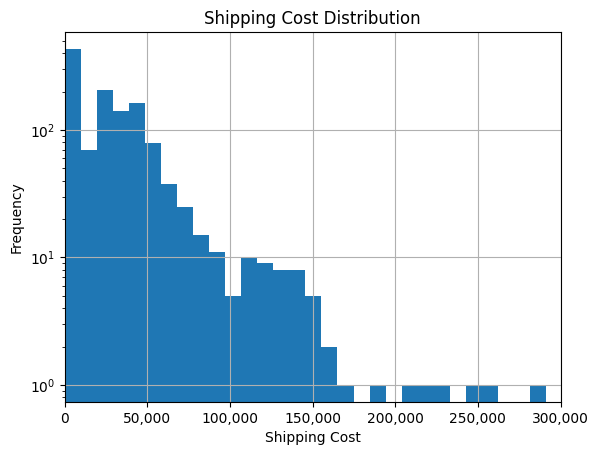

In [83]:
fig, ax = plt.subplots()
df_order_data['shipping_cost'].hist(bins=100, ax=ax, log=True)
plt.title('Shipping Cost Distribution')
plt.xlabel('Shipping Cost')
plt.ylabel('Frequency')

# Define a custom formatter
formatter = ticker.FuncFormatter(lambda x, pos: '{:,.0f}'.format(x))

# Apply the custom formatter to the x-axis
ax.xaxis.set_major_formatter(formatter)

# Set the x-axis limits to focus on the desired interval
ax.set_xlim(0, 300000)

plt.show()

### Comparison of shipping costs

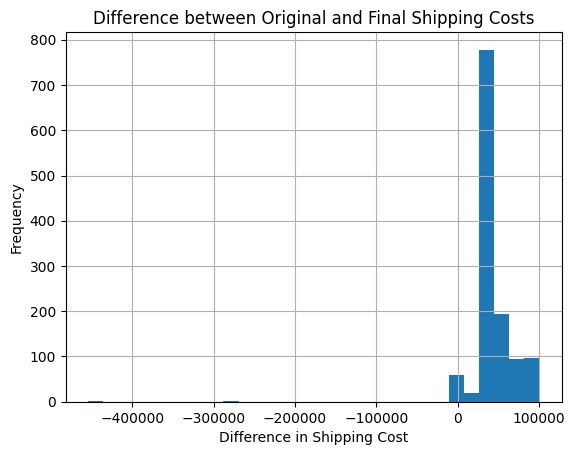

In [84]:
df_order_data['shipping_cost_diff'] = df_order_data['original_shipping_cost'] - df_order_data['shipping_cost']
df_order_data['shipping_cost_diff'].hist(bins=30)
plt.title('Difference between Original and Final Shipping Costs')
plt.xlabel('Difference in Shipping Cost')
plt.ylabel('Frequency')
plt.show()

### COD Cost Analysis

In [85]:
print("Percentage of COD orders: ", len(df_order_data[df_order_data['cod_cost'] > 0]) / len(df_order_data) * 100)
print("Average COD Cost: ", df_order_data['cod_cost'].mean())

Percentage of COD orders:  83.72093023255815
Average COD Cost:  14560.507246376812


### Gross Revenue Analysis

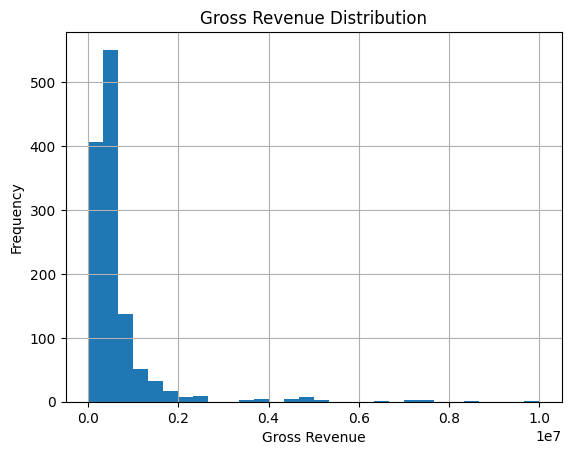

In [86]:
df_order_data['gross_revenue'].hist(bins=30)
plt.title('Gross Revenue Distribution')
plt.xlabel('Gross Revenue')
plt.ylabel('Frequency')
plt.show()

### Net Revenue Analysis

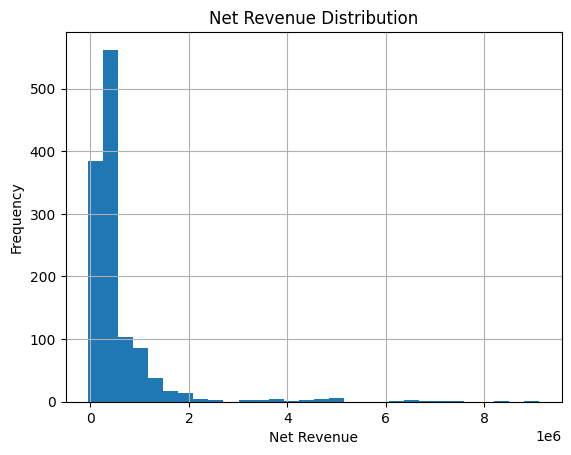

In [87]:
df_order_data['net_revenue'].hist(bins=30)
plt.title('Net Revenue Distribution')
plt.xlabel('Net Revenue')
plt.ylabel('Frequency')
plt.show()

In [88]:
df_order_data.columns

Index(['order_id', 'product', 'variation', 'quantity', 'bump', 'bump_price',
       'cogs', 'product_price', 'discount', 'shipping_cost',
       'original_shipping_cost', 'cod_cost', 'shipping_markup', 'other_cost',
       'gross_revenue', 'net_revenue', 'notes', 'name', 'phone', 'province',
       'city', 'subdistrict', 'status', 'payment_status', 'payment_method',
       'courier', 'created_at', 'processing_at', 'paid_at', 'coupon',
       'utm_source', 'utm_campaign_type', 'utm_medium', 'utm_content', 'Ads',
       'tags', 'Value Credit', 'Status', 'shipping_cost_diff'],
      dtype='object')

### Revenue Overtime (Bank Transfer, COD, Instant)

  created_at  net_revenue
0 2024-01-31   91624055.0
1 2024-02-29  132037985.0
2 2024-03-31  112094867.0
3 2024-04-30  143262800.0
4 2024-05-31  123373578.0
5 2024-06-30   97115847.0
6 2024-07-31   82517700.0
     paid_at  net_revenue
0 2024-01-31   46818555.0
1 2024-02-29   51637485.0
2 2024-03-31  102436567.0
3 2024-04-30  108722400.0
4 2024-05-31  105488077.0
5 2024-06-30  101716347.0
6 2024-07-31   61488300.0


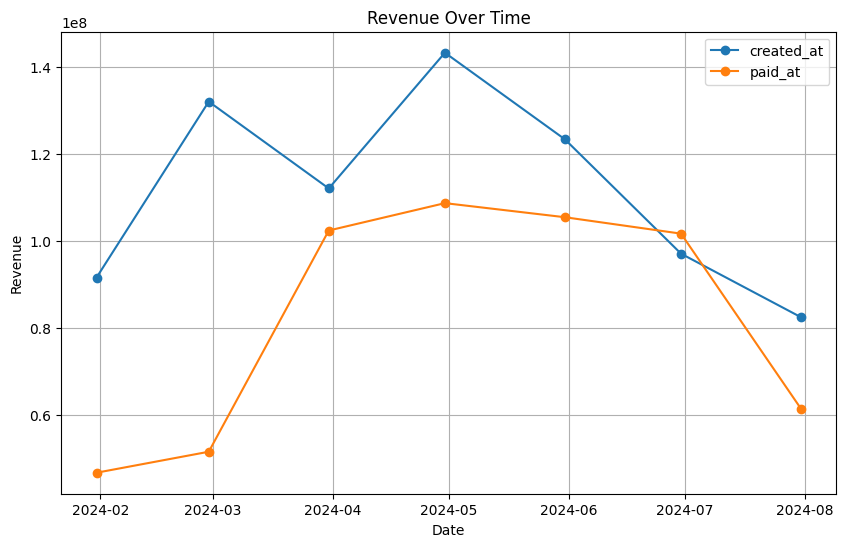

In [89]:
# Assuming df_order_data_filtered is your filtered dataframe

# Convert 'created_at' to datetime
df_order_data['created_at'] = pd.to_datetime(df_order_data['created_at'])

# Group by month and sum the revenue
revenue_over_time = df_order_data.resample('ME', on='created_at')['net_revenue'].sum().reset_index()

# Display the revenue over time dataframe
print(revenue_over_time)


# Convert 'created_at' to datetime
df_order_data['paid_at'] = pd.to_datetime(df_order_data['paid_at'],format="%d-%m-%Y - %H:%M")

# Group by month and sum the revenue
revenue_over_time_paid = df_order_data.dropna(subset='paid_at').resample('ME', on='paid_at')['net_revenue'].sum().reset_index()

# Display the revenue over time dataframe
print(revenue_over_time_paid)


# Plot the revenue over time
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(revenue_over_time['created_at'], revenue_over_time['net_revenue'], marker='o',label='created_at')
plt.plot(revenue_over_time_paid['paid_at'], revenue_over_time_paid['net_revenue'], marker='o',label='paid_at')
plt.title('Revenue Over Time')
plt.xlabel('Date')
plt.ylabel('Revenue')
plt.grid(True)
plt.legend()
plt.show()

     paid_at  net_revenue
0 2024-01-31   46818555.0
1 2024-02-29   51637485.0
2 2024-03-31  102436567.0
3 2024-04-30  108722400.0
4 2024-05-31  105488077.0
5 2024-06-30  101716347.0
6 2024-07-31   61488300.0


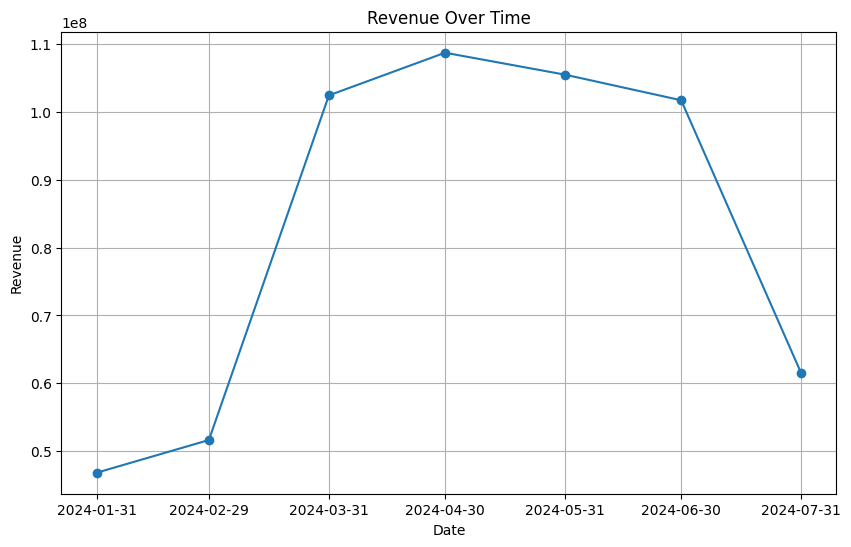

In [90]:
# Assuming df_order_data_filtered is your filtered dataframe

# Convert 'created_at' to datetime
df_order_data['paid_at'] = pd.to_datetime(df_order_data['paid_at'],format="%d-%m-%Y - %H:%M")

# Group by month and sum the revenue
revenue_over_time = df_order_data.resample('ME', on='paid_at')['net_revenue'].sum().reset_index()

# Display the revenue over time dataframe
print(revenue_over_time)

# Plot the revenue over time
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(revenue_over_time['paid_at'], revenue_over_time['net_revenue'], marker='o')
plt.title('Revenue Over Time')
plt.xlabel('Date')
plt.xticks(revenue_over_time['paid_at'])
plt.ylabel('Revenue')
plt.grid(True)
plt.show()

### Revenue form transfer

In [91]:
df_order_data['payment_method'].unique()

array(['bank_transfer', 'cod', nan, 'instant'], dtype=object)

In [92]:
df_order_data.loc[df_order_data['payment_method'] == 'bank_transfer']

,order_id,product,variation,quantity,bump,bump_price,cogs,product_price,discount,shipping_cost,...,coupon,utm_source,utm_campaign_type,utm_medium,utm_content,Ads,tags,Value Credit,Status,shipping_cost_diff
0,188888822.0,Parfum Walet NH3X Super,Ukuran 150 Gram,1,-,0.0,115000.0,260000.0,25000.0,47000.0,...,TRANSFERPARFUM,fb,Conversion Sales Manual,Facebook_Mobile_Feed,KM_USP_Musim_Hujan,Meta Ads,NaN,NaN,NaN,30000.0
11,188721008.0,Parfum Walet NH3X Super,Ukuran 150 Gram,2,Suara Top AIRLANGGA,288000.0,230000.0,400000.0,0.0,0.0,...,NaN,manual,wa_campaign,NaN,NaN,non_ads,REPEAT ORDER,NaN,NaN,57800.0
25,188524109.0,Parfum Walet NH3X Super,Ukuran 300 Gram,2,-,0.0,440000.0,860000.0,25000.0,120000.0,...,TRANSFERPARFUM,fb,Conversion Sales Manual,Facebook_Mobile_Feed,KM_Testimoni_Almuna,Meta Ads,NaN,NaN,NaN,30000.0
46,188275038.0,Parfum Walet NH3X Super,Ukuran 300 Gram,1,-,0.0,215000.0,400000.0,0.0,0.0,...,NaN,manual,wa_campaign,NaN,NaN,non_ads,REPEAT ORDER,NaN,NaN,68500.0
52,187959437.0,Parfum Walet NH3X Super,Ukuran 150 Gram,1,-,0.0,115000.0,260000.0,0.0,112000.0,...,NaN,manual,wa_campaign,NaN,NaN,non_ads,REPEAT ORDER,NaN,NaN,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1181,190224978.0,Parfum Walet NH3X Super,Ukuran 150 Gram,4,-,0.0,280000.0,800000.0,0.0,0.0,...,NaN,manual,wa_campaign,NaN,NaN,non_ads,REPEAT ORDER,NaN,NaN,17000.0
1231,189554019.0,Parfum Walet NH3X Super,Ukuran 150 Gram,2,-,0.0,230000.0,400000.0,0.0,0.0,...,NaN,manual,wa_campaign,NaN,NaN,non_ads,NaN,NaN,NaN,61000.0
1252,189386493.0,Parfum Walet NH3X Super,Ukuran 300 Gram,4,-,0.0,880000.0,1580000.0,0.0,138000.0,...,NaN,fb,Conversion Sales Manual,Others,KM_USP_2UkuranKemasan,Meta Ads,NaN,NaN,NaN,30000.0
1254,189381230.0,Parfum Walet NH3X Super,Ukuran 150 Gram,4,-,0.0,280000.0,800000.0,0.0,0.0,...,NaN,manual,wa_campaign,NaN,NaN,non_ads,REPEAT ORDER,NaN,NaN,48000.0


In [93]:
df_order_data[df_order_data['payment_method']=='bank_transfer'][['net_revenue']].sum()

net_revenue    215202681.0
dtype: float64

### Revenue from COD

In [94]:
df_order_data[df_order_data['payment_method']=='cod'][['net_revenue']].sum()

net_revenue    555929151.0
dtype: float64

### Revenue from instant

In [95]:
df_order_data[df_order_data['payment_method']=='instant'][['net_revenue']].sum()

net_revenue    10895000.0
dtype: float64

### Average Order Value per Month

C:\Users\M Fairuzzuddin Z\AppData\Local\Temp\ipykernel_38696\1947494635.py:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  average_order_value_per_month = df_order_data.resample('M', on='created_at')['net_revenue'].mean().reset_index()


  created_at    net_revenue
0 2024-01-31  583592.707006
1 2024-02-29  725483.434066
2 2024-03-31  541521.096618
3 2024-04-30  577672.580645
4 2024-05-31  677876.802198
5 2024-06-30  630622.383117
6 2024-07-31  730245.132743


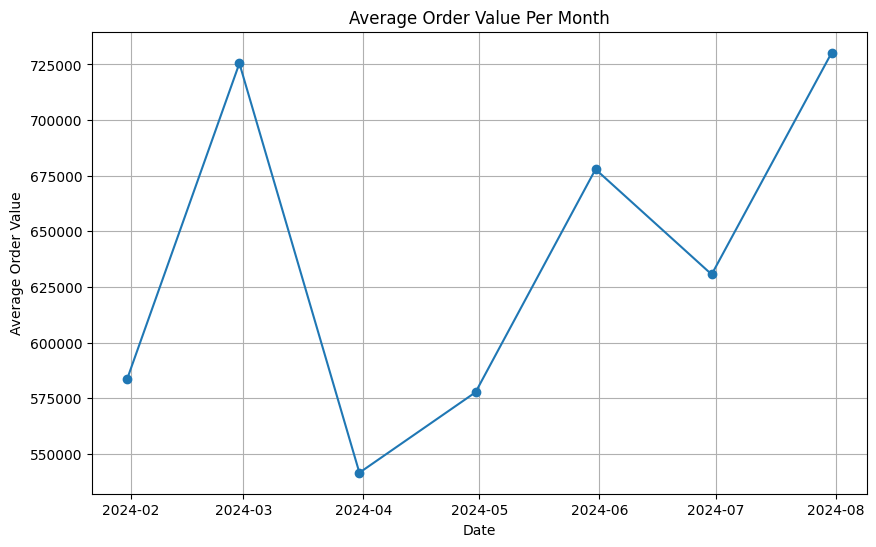

In [96]:
# Group by month and calculate the average order value
average_order_value_per_month = df_order_data.resample('M', on='created_at')['net_revenue'].mean().reset_index()

# Display the average order value per month dataframe
print(average_order_value_per_month)

# Plot the average order value per month
plt.figure(figsize=(10, 6))
plt.plot(average_order_value_per_month['created_at'], average_order_value_per_month['net_revenue'], marker='o')
plt.title('Average Order Value Per Month')
plt.xlabel('Date')
plt.ylabel('Average Order Value')
plt.grid(True)
plt.show()

### Total Value Credit

In [97]:
# Convert 'Value Credit' to numeric, forcing errors to NaN
df_order_data['Value Credit'] = pd.to_numeric(df_order_data['Value Credit'], errors='coerce')

# Sum the 'Value Credit' column, ignoring NaN values
total_value_credit = df_order_data['Value Credit'].sum()

print(f"Total Value Credit: {total_value_credit}")

Total Value Credit: 409881192.0


### Top 5 Province / city / district with high conversion value

In [98]:
df_order_data.groupby('province')[['Value Credit']].sum().sort_values(by='Value Credit',ascending=False).head(5)

,Value Credit
province,
Kalimantan Timur,50789638.0
Kalimantan Tengah,43294527.0
Sulawesi Selatan,35959184.0
Kalimantan Barat,31145894.0
Riau,28170961.0


### Top 5 City with high conversion value

In [99]:
df_order_data.groupby('city')[['Value Credit']].sum().sort_values(by='Value Credit',ascending=False).head(5)

,Value Credit
city,
Kab. Kutai Barat,11409030.0
Kab. Kutai Timur,10073179.0
Kota Palangka Raya,9939830.0
Kab. Mamuju,8662157.0
Kab. Tanah Bumbu,8205233.0


### Top 5 District with high conversion value

In [100]:
df_order_data.groupby('subdistrict')[['Value Credit']].sum().sort_values(by='Value Credit',ascending=False).head(5)

,Value Credit
subdistrict,
Jekan Raya,7538895.0
Watang Sawitto,4607377.0
Sepaku,4514818.0
Arut Selatan,4464000.0
Tembilahan,4153862.0


## Descriptive with Plot

### Histogram for order quantities

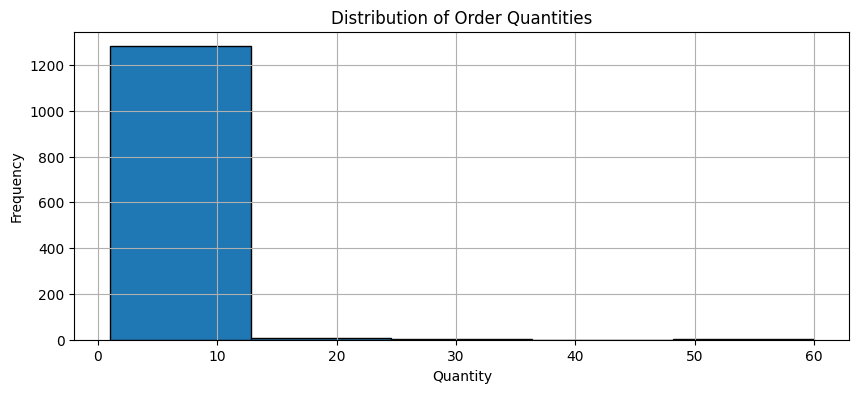

In [101]:
import matplotlib.pyplot as plt

# Plotting the histogram for order quantities
plt.figure(figsize=(10, 4))
df_order_data['quantity'].plot(kind='hist', bins=5, edgecolor='black')
plt.title('Distribution of Order Quantities')
plt.xlabel('Quantity')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


### Histogram of Value Credit

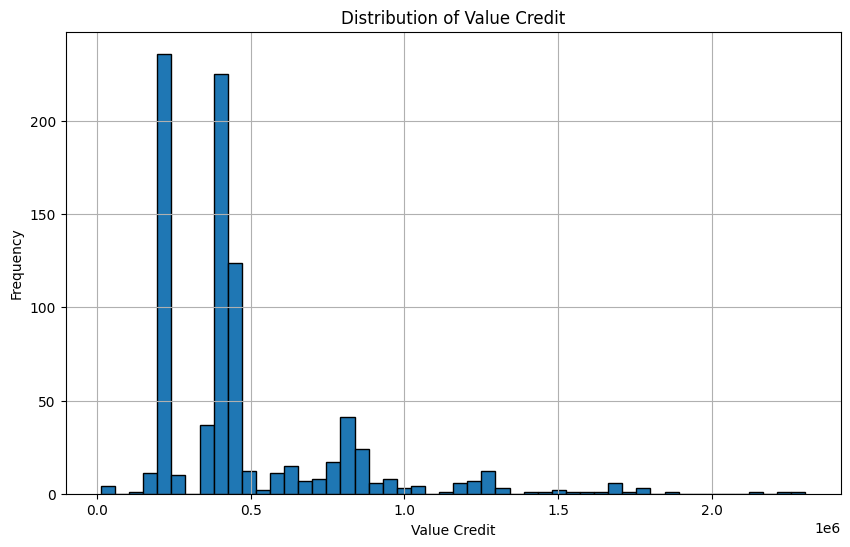

In [102]:
import matplotlib.pyplot as plt

# Plotting the histogram for 'Value Credit'
plt.figure(figsize=(10, 6))
df_order_data['Value Credit'] = pd.to_numeric(df_order_data['Value Credit'], errors='coerce')
df_order_data['Value Credit'].dropna().plot(kind='hist', bins=50, edgecolor='black')
plt.title('Distribution of Value Credit')
plt.xlabel('Value Credit')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

### Barplot Total Quantities Sold

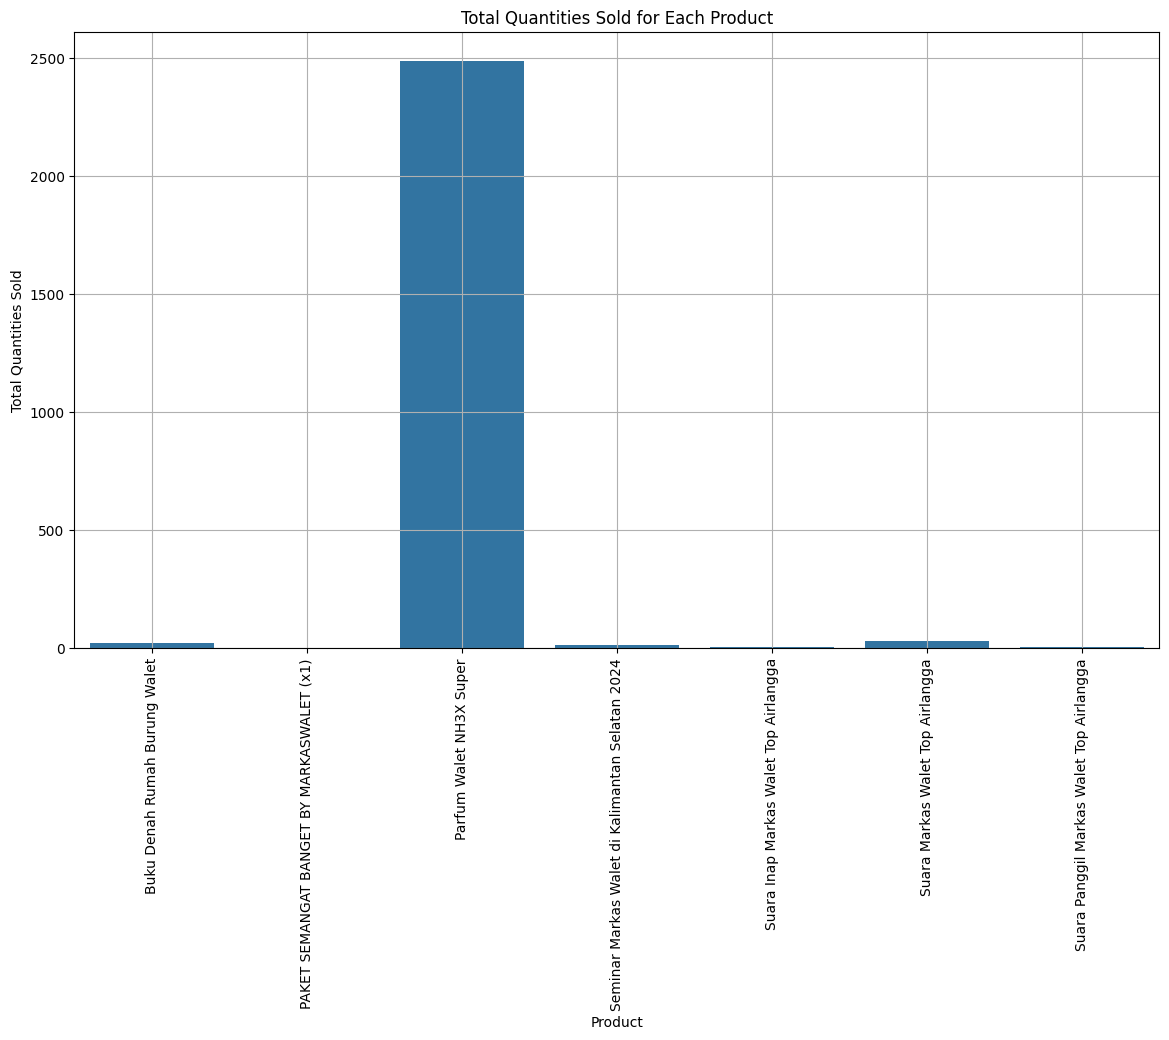

In [103]:
import seaborn as sns

# Calculate total quantities sold for each product
total_quantities_per_product = df_order_data.groupby('product')['quantity'].sum().reset_index()

# Plotting the barplot
plt.figure(figsize=(14, 8))
sns.barplot(x='product', y='quantity', data=total_quantities_per_product)
plt.title('Total Quantities Sold for Each Product')
plt.xlabel('Product')
plt.ylabel('Total Quantities Sold')
plt.xticks(rotation=90)
plt.grid(True)
plt.show()

### Pie chart total revenue per product

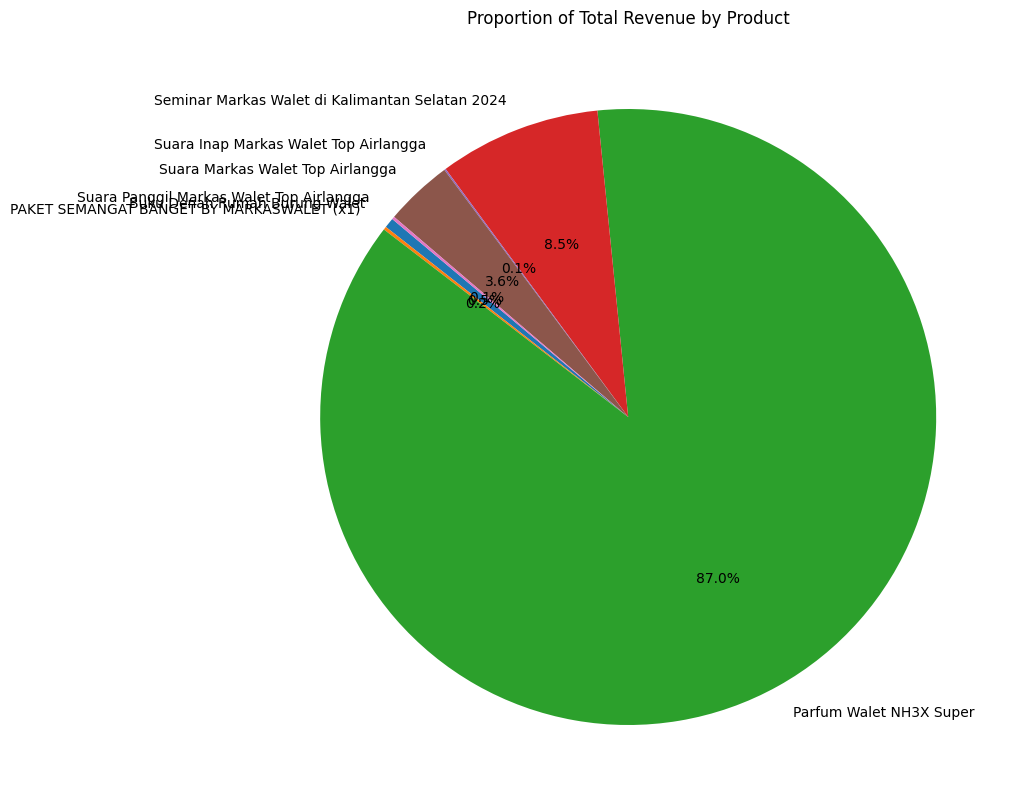

In [104]:
# Calculate total revenue per product
total_revenue_per_product = df_order_data.groupby('product')['net_revenue'].sum().reset_index()

# Plotting the piechart
plt.figure(figsize=(10, 10))
plt.pie(total_revenue_per_product['net_revenue'], labels=total_revenue_per_product['product'], autopct='%1.1f%%', startangle=140)
plt.title('Proportion of Total Revenue by Product')
plt.show()

### Cat Barplot number of order by variation

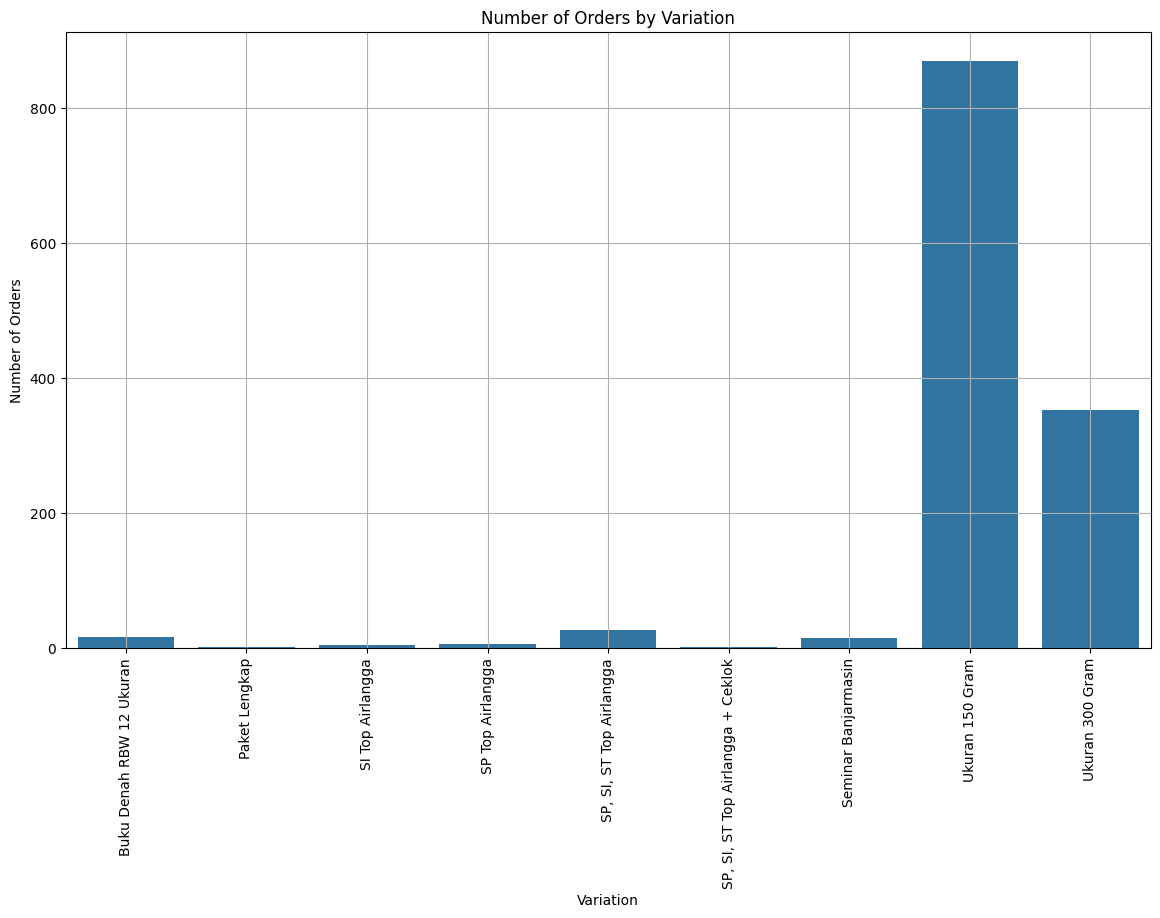

In [105]:
# Calculate the number of orders by variation
orders_by_variation = df_order_data.groupby('variation')['order_id'].count().reset_index()
orders_by_variation.columns = ['variation', 'number_of_orders']

# Plotting the category barplot
plt.figure(figsize=(14, 8))
sns.barplot(x='variation', y='number_of_orders', data=orders_by_variation)
plt.title('Number of Orders by Variation')
plt.xlabel('Variation')
plt.ylabel('Number of Orders')
plt.xticks(rotation=90)
plt.grid(True)
plt.show()

6. Bank Transfer always did not have Value Credit. to fill value credit should we remain the same value for its column?

10. When processing at is null and paid at is null, then status is cancel or pending

11. When processing at is null and paid at has value, we need to ensure another column data table in shipment

12. When processing at is not null then paid at blank, it refers to condition cancelled and still on shipping

13. Melihat data dibulan Juni (created_at in June) and (status = processing)

In [106]:
df_order_data.to_csv('data_order_processed.csv')

# Solution for Problem 1

Knowing the exact customer who have been purchased more than one time is very important, then we can exclude the customer who still purchase 1 time

### 1. Create a customer ID to know the exact amount of repeat order in data

In [107]:
import pandas as pd

# Load the provided dataset
df = df_order_data

# Display a sample of the data
print(df[['name', 'phone']].head())

# Fill NaN values with empty strings
df['name'].fillna('', inplace=True)
df['phone'].fillna('', inplace=True)

# Ensure all entries are strings
df['name'] = df['name'].astype(str)
df['phone'] = df['phone'].astype(str)

# Define a function to clean names and phone numbers
def clean_name_phone(name, phone):
    # Clean the name
    cleaned_name = ''.join(e for e in name if e.isalnum()).lower()
    
    # Clean the phone number
    cleaned_phone = ''.join(e for e in phone if e.isdigit())
    
    return cleaned_name, cleaned_phone

# Apply the cleaning function to the dataset
df[['cleaned_name', 'cleaned_phone']] = df.apply(lambda row: clean_name_phone(row['name'], row['phone']), axis=1, result_type='expand')

# Generate customer ID by concatenating cleaned name and phone
df['customer_id'] = df['cleaned_name'] + df['cleaned_phone']

# Drop the cleaned columns (optional)
df.drop(columns=['cleaned_name', 'cleaned_phone'], inplace=True)

# Display the updated dataset
print(df[['name', 'phone', 'customer_id']].head())

# Save the updated dataset
df.to_csv('data_order_processed_with_customer_id.csv', index=False)

                               name           phone
0                   Lorensius S.Sos  +6281347226721
1                             Ikram  +6285395286959
2                             Ansel  +6281250340881
3                           Sukardi  +6282357435641
4  Praditya dimas putra damar agung  +6281804030471
                               name           phone  \
0                   Lorensius S.Sos  +6281347226721   
1                             Ikram  +6285395286959   
2                             Ansel  +6281250340881   
3                           Sukardi  +6282357435641   
4  Praditya dimas putra damar agung  +6281804030471   

                                 customer_id  
0                 lorensiusssos6281347226721  
1                         ikram6285395286959  
2                         ansel6281250340881  
3                       sukardi6282357435641  
4  pradityadimasputradamaragung6281804030471  


C:\Users\M Fairuzzuddin Z\AppData\Local\Temp\ipykernel_38696\739617661.py:10: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['name'].fillna('', inplace=True)
C:\Users\M Fairuzzuddin Z\AppData\Local\Temp\ipykernel_38696\739617661.py:11: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

In [108]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1290 entries, 0 to 1292
Data columns (total 40 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   order_id                1290 non-null   float64       
 1   product                 1290 non-null   object        
 2   variation               1290 non-null   object        
 3   quantity                1290 non-null   int64         
 4   bump                    1243 non-null   object        
 5   bump_price              1287 non-null   float64       
 6   cogs                    1289 non-null   float64       
 7   product_price           1289 non-null   float64       
 8   discount                1248 non-null   float64       
 9   shipping_cost           1243 non-null   float64       
 10  original_shipping_cost  1243 non-null   float64       
 11  cod_cost                1242 non-null   float64       
 12  shipping_markup         1243 non-null   float64      

In [109]:
df['customer_id'].value_counts()

customer_id
                                   47
papahaidar6281233809217             5
supriyadi6285239812881              5
cellwanemo6281342076500             5
jeremylucas6282153245942            5
                                   ..
sofyan6281272148288                 1
nur6281525787334                    1
kulim6282353607252                  1
restuyuwono6285392227771            1
sutriyotarisbuwana6281347746492     1
Name: count, Length: 982, dtype: int64

In [110]:
# Sort the value counts by the highest count first
sorted_value_counts = df['customer_id'].value_counts().sort_values(ascending=False)

# Display the sorted value counts
print(sorted_value_counts.head(178))

customer_id
                             47
cellwanemo6281342076500       5
jeremylucas6282153245942      5
papahaidar6281233809217       5
supriyadi6285239812881        5
                             ..
herman6282393455145           2
tokodeatex6285230916895       2
sibgatullah6285248101489      2
rahimsuryadi6282283911043     2
abdulrokhim6282390645955      1
Name: count, Length: 178, dtype: int64


In [111]:
df_order_data['phone'].value_counts().sort_values(ascending=False)

phone
                  47
+6282110444111     6
+6281233809217     5
+6281342076500     5
+6282153245942     5
                  ..
+6285268355009     1
+6282148820699     1
+6281331164888     1
+6281345771473     1
+6281347746492     1
Name: count, Length: 949, dtype: int64

### 2. Calculate the amount of Repat order customer and one time order customer

In [112]:
# Count the occurrences of each customer_id
customer_counts = df['customer_id'].value_counts()

# Separate customers who have made only one purchase
one_time_customers = customer_counts[customer_counts == 1].index

# Separate customers who have made more than one purchase
multiple_time_customers = customer_counts[customer_counts > 1].index

# Get the details of one-time purchase customers
one_time_customers_details = df[df['customer_id'].isin(one_time_customers)]

# Get the details of multiple-time purchase customers
multiple_time_customers_details = df[df['customer_id'].isin(multiple_time_customers)]

In [113]:
# Display the results
print("Customers with only one purchase:")
len(one_time_customers_details)

Customers with only one purchase:


805

In [114]:
print("\nCustomers with more than one purchase:")
len(multiple_time_customers_details)


Customers with more than one purchase:


485

In [115]:
multiple_time_customers_details['customer_id'].value_counts()

customer_id
                            47
supriyadi6285239812881       5
cellwanemo6281342076500      5
jeremylucas6282153245942     5
papahaidar6281233809217      5
                            ..
syaifularif6282119194839     2
ajan6282154808120            2
ibrahim6282291099147         2
yudisaputra6282254378123     2
abdrahman6285241886238       2
Name: count, Length: 177, dtype: int64

In [116]:
# Save to CSV files
one_time_customers_details.to_csv('one_time_customers_details.csv', index=False)
multiple_time_customers_details.to_csv('multiple_time_customers_details.csv', index=False)

### 3. Calculate the average time when customer are most likely to buy at the second time 

#### 3.1 Average Time Between Orders
1 **Average Time for Repeat Orders:** The average time difference between orders for multiple-time customers varies significantly.

2 **Time Analysis:** For some customers, the repeat purchase happens within a short time span (e.g., 3.39 days), while others take longer (e.g., 89 days).

#### 3.2 Strategies Based on Time Analysis

1. **Segment Customers Based on Purchase Frequency:**
   - **High Frequency Customers:** Follow up within a shorter time frame (e.g., 1-2 weeks) as they are more likely to make frequent purchases.
   - **Low Frequency Customers:** Follow up at a longer interval (e.g., 1-2 months) with reminders and special offers to encourage them to make another purchase.
   
2. **Timing Follow-ups:**
   - **Immediate Follow-up:** Send a thank you email immediately after purchase and introduce similar or complementary products.
   - **Scheduled Reminders:** Based on the average time between orders, schedule follow-up emails or messages reminding customers of new arrivals, special promotions, or discounts.

In [117]:
# Ensure 'created_at' is in datetime format
df['created_at'] = pd.to_datetime(df['created_at'])

# Sort the DataFrame by 'customer_id' and 'created_at'
df.sort_values(by=['customer_id', 'created_at'], inplace=True)

# Calculate the time difference between consecutive orders for each customer
df['time_diff'] = df.groupby('customer_id')['created_at'].diff().dt.days

# Filter to keep only customers with multiple purchases
multiple_time_customers = df['customer_id'].value_counts()[df['customer_id'].value_counts() > 1].index
multiple_time_customers_df = df[df['customer_id'].isin(multiple_time_customers)]

# Calculate the average time difference for each customer
average_time_diff = multiple_time_customers_df.groupby('customer_id')['time_diff'].mean().reset_index()

# Display the results
print(average_time_diff)

                    customer_id  time_diff
0                                 3.391304
1    abangmartinus6281345515598  48.000000
2        abdrahman6285241886238   0.000000
3        abdulaven6281253351071  31.500000
4         abusyuro6285298142011  21.000000
..                          ...        ...
172      yenicawan6281367547969  33.000000
173    yudisaputra6282254378123  60.000000
174  yuliarosalina6281343342938  34.000000
175         yunika6281261777710  71.000000
176         zainal6281222790232  89.000000

[177 rows x 2 columns]


In [118]:
average_time_diff['time_diff'].mean()

46.53045934659789

### 4. **Focus on Manual and Facebook Channels:**
   - Since a significant number of repeat customers come from manual and Facebook channels, these sources can be leveraged more effectively.
   - Tailor marketing strategies specifically for these channels to drive more repeat orders.

In [119]:
# Analyze the distribution of marketing attributes for multiple-time customers
multiple_time_customers_campaign = multiple_time_customers_details['utm_campaign_type'].value_counts()
multiple_time_customers_source = multiple_time_customers_details['utm_source'].value_counts()
multiple_time_customers_content = multiple_time_customers_details['utm_content'].value_counts()
multiple_time_customers_ads = multiple_time_customers_details['Ads'].value_counts()

In [120]:
# Analyze the distribution of marketing attributes for one-time customers
one_time_customers_campaign = one_time_customers_details['utm_campaign_type'].value_counts()
one_time_customers_source = one_time_customers_details['utm_source'].value_counts()
one_time_customers_content = one_time_customers_details['utm_content'].value_counts()
one_time_customers_ads = one_time_customers_details['Ads'].value_counts()

In [121]:
# Display the results
print("Multiple-time customers - Campaigns:\n", multiple_time_customers_campaign)
print("One-time customers - Campaigns:\n", one_time_customers_campaign)

Multiple-time customers - Campaigns:
 utm_campaign_type
wa_campaign                251
Conversion Sales Manual    122
Conversion Advantage+       62
google_uc                    3
Name: count, dtype: int64
One-time customers - Campaigns:
 utm_campaign_type
Conversion Sales Manual           434
Conversion Advantage+             210
wa_campaign                       146
google_uc                          10
Conversion Sales Manual Tiktok      4
Name: count, dtype: int64


### 5. *Leverage WA Campaigns and Conversion Sales Manual:*
   - WA campaigns and manual sales conversions are highly effective for repeat customers.
   - These campaigns should be optimized and potentially expanded to capture more repeat orders.

In [122]:
print("Multiple-time customers - Sources:\n", multiple_time_customers_source)
print("One-time customers - Sources:\n", one_time_customers_source)

Multiple-time customers - Sources:
 utm_source
manual       251
fb           171
ig            13
google_uc      3
Name: count, dtype: int64
One-time customers - Sources:
 utm_source
fb           606
manual       146
ig            38
google_uc     10
tiktok         4
Name: count, dtype: int64


### 6. *Improve and Diversify Content:*
   - Content like KM_USP_2UkuranKemasan, KM_USP_Jagonya_Inapkan, and KM_USP_Musim_Hujan have shown to engage multiple-time customers.
   - Continue producing and optimizing such content and explore creating similar content types to keep customers engaged.

In [123]:
print("Multiple-time customers - Content:\n", multiple_time_customers_content.head(3))
print("One-time customers - Content:\n", one_time_customers_content.head(3))

Multiple-time customers - Content:
 utm_content
KM_USP_2UkuranKemasan     37
KM_USP_Jagonya_Inapkan    34
KM_USP_Musim_Hujan        26
Name: count, dtype: int64
One-time customers - Content:
 utm_content
KM_USP_Jagonya_Inapkan    105
KM_USP_Musim_Hujan        100
KM_USP_2UkuranKemasan      76
Name: count, dtype: int64


### 7. *Optimize Ads Strategy:*
   - While Meta Ads have a higher number of one-time customers, non-ads channels and manual efforts are more effective for repeat customers.
   - Optimize ad campaigns to align with the strategies used in manual and non-ads efforts.

In [124]:
print("Multiple-time customers - Ads:\n", multiple_time_customers_ads)
print("One-time customers - Ads:\n", one_time_customers_ads)

Multiple-time customers - Ads:
 Ads
non_ads       251
Meta Ads      184
google_ads      3
Name: count, dtype: int64
One-time customers - Ads:
 Ads
Meta Ads      644
non_ads       146
google_ads     10
tiktok ads      4
Name: count, dtype: int64


## 8. Insights from Customer Details

1 **Multiple-time Customers:** These customers are already engaged and can be encouraged to continue purchasing through loyalty programs, exclusive discounts, and early access to new products.

2 **One-time Customers:** 

   **Strategies to Engage One-time Customers:**
   - **Personalized Offers:** Send personalized emails with offers based on their past purchase to make them feel valued.
   - **Survey and Feedback:** Reach out to understand their experience and ask for feedback. Use this data to improve services and address any pain points.
   - **Content and Ads:** Focus content and advertisements on the most effective campaigns (e.g., "KM_USP_2UkuranKemasan") and channels (e.g., Facebook, manual sources) that have shown engagement with multiple-time customers.

3. **Focus on Effective Campaigns and Sources:**
   - **Campaigns:** WA campaigns and manual conversions are effective for multiple-time customers. Emphasize these in follow-ups and promotions.
   - **Sources:** Facebook and manual channels show higher repeat customer engagement. Increase marketing efforts in these channels.
   
4. **Leveraging Content and Ads:**
   - **Content:** Use successful content strategies (e.g., "KM_USP_2UkuranKemasan", "KM_USP_Jagonya_Inapkan") to engage one-time customers.
   - **Ads:** Optimize ad spend by focusing on channels that convert one-time customers to repeat buyers. Consider reallocating budget from less effective sources to more effective ones.

By analyzing the time between orders and focusing on targeted follow-up strategies, we can increase repeat orders and convert one-time customers into loyal repeat buyers.


# Solution for Problem 2

**2. Strategi marketing yang seperti apa yang dapat meningkatkan value penjualan per transaksi dan repeat order pelanggan?**

In [125]:
# Filter the DataFrame to include only rows where 'paid_at' is not null
paid_data = df[df['paid_at'].notnull()]
unpaid_data = df[df['paid_at'].isnull()]

# Get the value counts of the 'utm_source', 'utm_campaign_type', 'utm_content', 'ads' columns in the filtered DataFrames
multiple_time_customers_source = paid_data['utm_source'].value_counts()
one_time_customers_source = unpaid_data['utm_source'].value_counts()

multiple_time_customers_campaign = paid_data['utm_campaign_type'].value_counts()
one_time_customers_campaign = unpaid_data['utm_campaign_type'].value_counts()

multiple_time_customers_content = paid_data['utm_content'].value_counts()
one_time_customers_content = unpaid_data['utm_content'].value_counts()

multiple_time_customers_ads = paid_data['Ads'].value_counts()
one_time_customers_ads = unpaid_data['Ads'].value_counts()

In [126]:

# Display the results
print("Multiple-time customers - Sources:\n", multiple_time_customers_source)
print("One-time customers - Sources:\n", one_time_customers_source)

print("Multiple-time customers - Campaigns:\n", multiple_time_customers_campaign)
print("One-time customers - Campaigns:\n", one_time_customers_campaign)

print("Multiple-time customers - Content:\n", multiple_time_customers_content.head(3))
print("One-time customers - Content:\n", one_time_customers_content.head(3))

print("Multiple-time customers - Ads:\n", multiple_time_customers_ads)
print("One-time customers - Ads:\n", one_time_customers_ads)

Multiple-time customers - Sources:
 utm_source
fb           520
manual       353
ig            38
google_uc      9
tiktok         3
Name: count, dtype: int64
One-time customers - Sources:
 utm_source
fb           257
manual        44
ig            13
google_uc      4
tiktok         1
Name: count, dtype: int64
Multiple-time customers - Campaigns:
 utm_campaign_type
Conversion Sales Manual           387
wa_campaign                       353
Conversion Advantage+             171
google_uc                           9
Conversion Sales Manual Tiktok      3
Name: count, dtype: int64
One-time customers - Campaigns:
 utm_campaign_type
Conversion Sales Manual           169
Conversion Advantage+             101
wa_campaign                        44
google_uc                           4
Conversion Sales Manual Tiktok      1
Name: count, dtype: int64
Multiple-time customers - Content:
 utm_content
KM_USP_Jagonya_Inapkan    92
KM_USP_Musim_Hujan        91
KM_USP_2UkuranKemasan     77
Name: count, dt

### 1. Optimize Successful Campaigns:

Enhance WA Campaigns: Use WhatsApp campaigns to maintain direct communication with customers, providing personalized offers and updates.

Leverage Manual Sales Conversions: Continue focusing on manual sales strategies that have shown success in engaging repeat customers.

In [127]:
# Analyze net revenue for different campaigns
campaign_revenue = paid_data.groupby('utm_campaign_type')['net_revenue'].sum()
print("Campaign revenue:\n", campaign_revenue.sort_values(ascending=False))

Campaign revenue:
 utm_campaign_type
wa_campaign                       312902291.0
Conversion Sales Manual           171498900.0
Conversion Advantage+              85986540.0
google_uc                           6750000.0
Conversion Sales Manual Tiktok      1170000.0
Name: net_revenue, dtype: float64


### 2. Focus on Effective Sources:

Increase Facebook Engagement: Invest more in Facebook ads and content, as it shows a high conversion rate for repeat orders.

Utilize Manual Channels: Strengthen manual sales channels by providing additional support and resources to the sales team.

In [128]:
source_revenue = paid_data.groupby('utm_source')['net_revenue'].sum()
print("Source revenue:\n", source_revenue.sort_values(ascending=False))

Source revenue:
 utm_source
manual       312902291.0
fb           239669040.0
ig            17816400.0
google_uc      6750000.0
tiktok         1170000.0
Name: net_revenue, dtype: float64


### 3. Content Personalization:

Create Engaging Content: Develop more content similar to 'KM_USP_2UkuranKemasan' and 'KM_USP_Jagonya_Inapkan' which have shown success in engaging customers.

Seasonal and Thematic Campaigns: Use content that resonates with customers during specific seasons or events to drive engagement and repeat purchases.

In [129]:
content_revenue = paid_data.groupby('utm_content')['net_revenue'].sum()
print("Content revenue:\n", content_revenue.sort_values(ascending=False))

Content revenue:
 utm_content
KM_USP_Musim_Hujan                    42679400.0
KM_USP_Jagonya_Inapkan                40289800.0
KM_USP_2UkuranKemasan                 31593000.0
KM_Testimoni_Almuna                   24048000.0
KM_Problem_Parfum_Bukan_Mengundang    13131800.0
KM_Demo_Cara_Pemakaian                12286000.0
KM_Problem_Walet_Hanya_Berputar       11664000.0
KM_Testimoni_Opiq                      9582000.0
KM_Testimoni_Video_Juni                8386000.0
manfaat_produk                         4590000.0
KM_Demo_Cara_Pemakaian_Video_Juni      3885000.0
KM_Testimoni_CCTV                      2821000.0
KM_Problem_Ikut_Webinar                2540000.0
KM_Testimoni_SC_WA_Video               2526500.0
KM_Demo_Bedah_TataSuara                2500000.0
KM_Testimoni_Panen                     1620000.0
KM_Problem_TataRuang                   1560000.0
demo_produk                            1180000.0
KM_Problem_Bau_Gedung                  1175000.0
KM_USP_3in1                            

### 4. Ad Strategy Optimization:

Focus on Proven Ad Platforms: Allocate more budget to Meta Ads and Google Ads, which have shown higher engagement and conversion rates.
Non-Ad Engagement: Develop non-ad based strategies such as email marketing and social media content to engage customers without direct ads.

In [130]:
ads_revenue = paid_data.groupby('Ads')['net_revenue'].sum()
print("Ads revenue:\n", ads_revenue.sort_values(ascending=False))

Ads revenue:
 Ads
non_ads       312902291.0
Meta Ads      257485440.0
google_ads      6750000.0
tiktok ads      1170000.0
Name: net_revenue, dtype: float64


In [131]:
# Calculate the average time difference for customers with multiple orders
paid_data.loc[:,'created_at'] = pd.to_datetime(paid_data['created_at'])
time_diffs = paid_data.groupby('customer_id')['created_at'].apply(lambda x: (x.max() - x.min()).days)
average_time_diff = time_diffs.mean()
print("Average time difference between orders for multiple-time customers: {:.2f} days".format(average_time_diff))

Average time difference between orders for multiple-time customers: 13.04 days


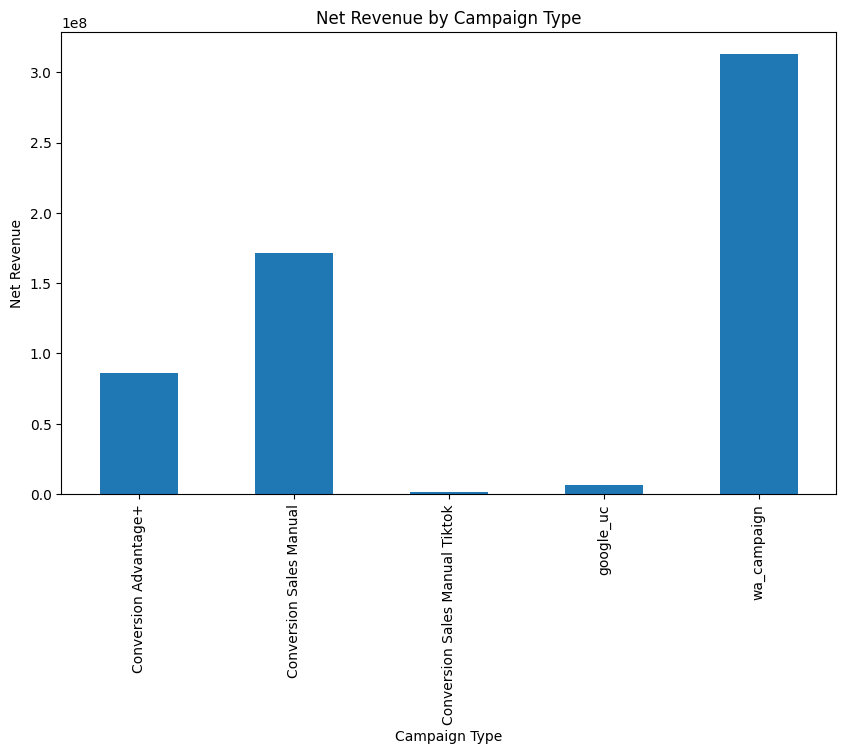

In [132]:

# Plotting histograms for visual analysis
import matplotlib.pyplot as plt

# Plot the distribution of net revenue for different campaigns
plt.figure(figsize=(10, 6))
campaign_revenue.plot(kind='bar')
plt.title('Net Revenue by Campaign Type')
plt.xlabel('Campaign Type')
plt.ylabel('Net Revenue')
plt.show()

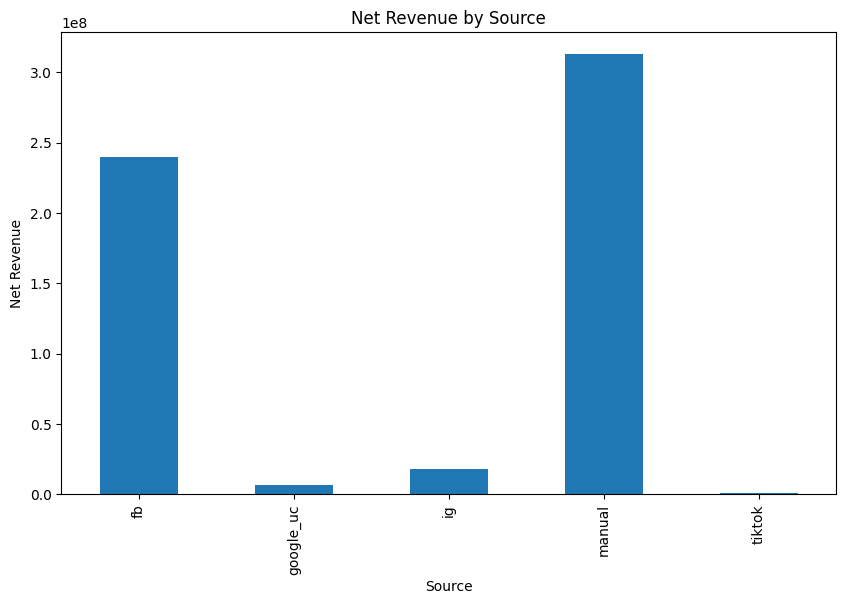

In [133]:

# Plot the distribution of net revenue for different sources
plt.figure(figsize=(10, 6))
source_revenue.plot(kind='bar')
plt.title('Net Revenue by Source')
plt.xlabel('Source')
plt.ylabel('Net Revenue')
plt.show()

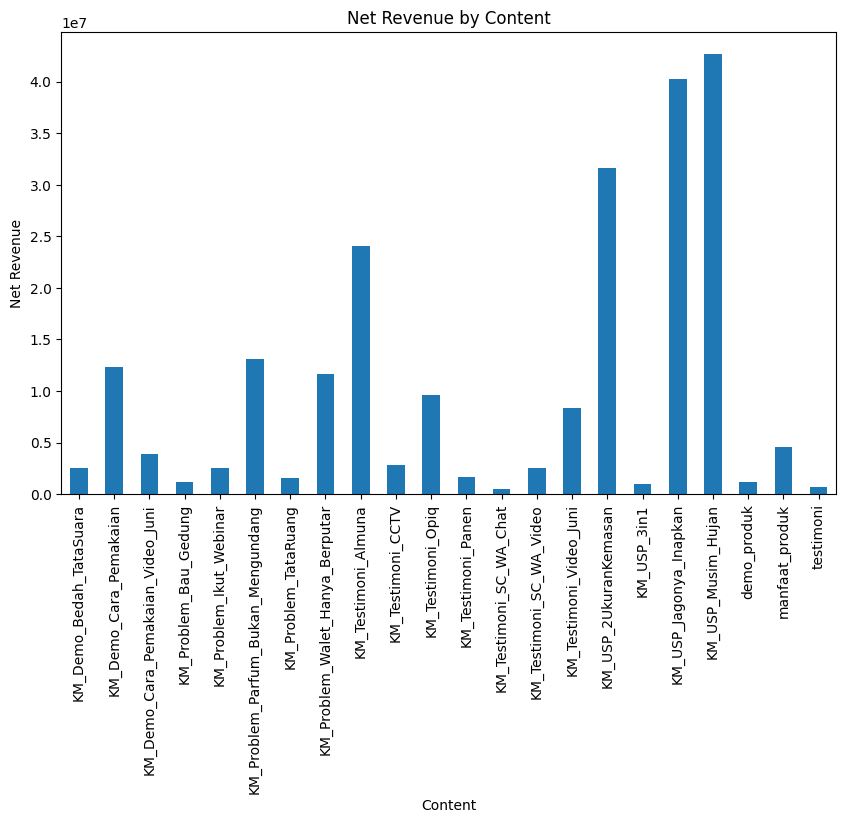

In [134]:

# Plot the distribution of net revenue for different content
plt.figure(figsize=(10, 6))
content_revenue.plot(kind='bar')
plt.title('Net Revenue by Content')
plt.xlabel('Content')
plt.ylabel('Net Revenue')
plt.show()

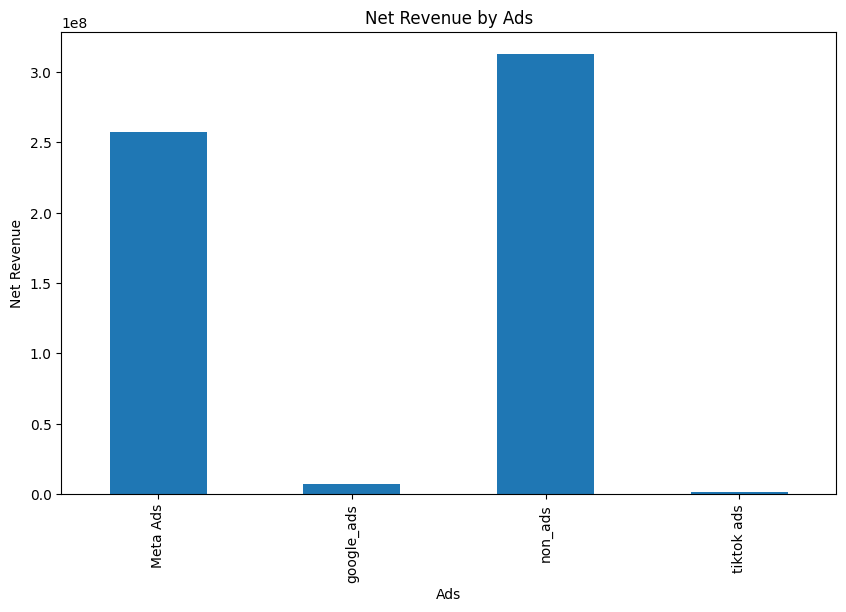

In [135]:

# Plot the distribution of net revenue for different ads
plt.figure(figsize=(10, 6))
ads_revenue.plot(kind='bar')
plt.title('Net Revenue by Ads')
plt.xlabel('Ads')
plt.ylabel('Net Revenue')
plt.show()

# Solution for Problem 3

**3. Bagaimana perusahaan dapat menurunkan biaya operational berdasarkan efisiensi aktifitas pembelian**

To answer this question, we need to make sure all of cost distribution from upstream to downtsream is allocated well, without any outreach expenditure. Then we can look at certain data like the shipment cost, cod cost, courier with less performance, courier with high expenses

In [136]:
# Filter data where 'paid_at' is null (unpaid orders)
unpaid_data = df[df['paid_at'].isnull()]

### 1. Courier dengan unpaid tertinggi
- **JNE - REG** has the highest number of unpaid orders with 171 instances.
- **NINJA - STANDARD** follows with 154 unpaid orders.
- Other couriers like **J&T - EZ** and **IDEXPRESS - STANDARD** have significantly fewer unpaid orders.

In [137]:
# 1. Courier dengan unpaid tertinggi
courier_unpaid_count = unpaid_data['courier'].value_counts()

In [138]:
print("Courier dengan unpaid tertinggi:\n", courier_unpaid_count)

Courier dengan unpaid tertinggi:
 courier
JNE - REG               171
NINJA - STANDARD        154
J&T - EZ                 17
-                        11
IDEXPRESS - STANDARD      9
IDEXPRESS - REGULER       3
OEXPRESS - HORE           2
Name: count, dtype: int64


### 2. Courier dengan original shipping tertinggi
- **JNE - REG** leads with the highest original shipping cost at **1,274,400**.
- **NINJA - STANDARD** comes next with **842,750**.
- Other couriers have much lower original shipping costs.

In [139]:
# 2. Courier dengan original shipping tertinggi
courier_original_shipping = unpaid_data.groupby('courier')['original_shipping_cost'].sum()

In [140]:
print("\nCourier dengan original shipping tertinggi:\n", courier_original_shipping.sort_values(ascending=False))


Courier dengan original shipping tertinggi:
 courier
JNE - REG               12744000.0
NINJA - STANDARD         8427500.0
J&T - EZ                 1379000.0
IDEXPRESS - STANDARD      622000.0
IDEXPRESS - REGULER       262500.0
OEXPRESS - HORE            43000.0
-                              0.0
Name: original_shipping_cost, dtype: float64


### 3. Rata-rata biaya pengiriman berdasarkan kurir
- **IDEXPRESS - REGULER** has the highest average original shipping cost at **87,500**.
- **JNE - REG** follows with an average cost of **82,753**.
- **NINJA - STANDARD** and other couriers have lower average costs.

In [141]:
# 3. Rata-rata biaya pengiriman berdasarkan kurir
avg_courier_original_shipping = unpaid_data.groupby('courier')['original_shipping_cost'].mean()

In [142]:
print("\nRata-rata Courier dengan original shipping tertinggi:\n", avg_courier_original_shipping.sort_values(ascending=False))


Rata-rata Courier dengan original shipping tertinggi:
 courier
IDEXPRESS - REGULER     87500.000000
JNE - REG               82753.246753
J&T - EZ                81117.647059
IDEXPRESS - STANDARD    69111.111111
NINJA - STANDARD        67963.709677
OEXPRESS - HORE         21500.000000
-                           0.000000
Name: original_shipping_cost, dtype: float64


### 4. Courier dengan payment method COD termahal secara rata-rata
- **J&T - EZ** has the highest average COD cost at **23,692.39**.
- **NINJA - STANDARD** and **JNE - REG** have average COD costs of **18,009.23** and **16,260.09**, respectively.
- **OEXPRESS - HORE** has an average COD cost of **15,750**.

In [143]:
# 4. Courier dengan payment method COD termahal secara rata-rata
courier_cod_cost = paid_data[paid_data['payment_method'] == 'cod'].groupby('courier')['cod_cost'].mean()

In [144]:
print("\nCourier dengan payment method COD termahal secara rata-rata:\n", courier_cod_cost.sort_values(ascending=False))


Courier dengan payment method COD termahal secara rata-rata:
 courier
J&T - EZ                23692.391304
NINJA - STANDARD        18009.230769
JNE - REG               16260.091743
OEXPRESS - HORE         15750.000000
IDEXPRESS - STANDARD    14058.823529
Name: cod_cost, dtype: float64


### 5. UTM content, UTM source, dan UTM campaign type dengan unpaid tertinggi
- **UTM Content**:
  - **KM_USP_Jagonya_Inapkan** leads with **47** unpaid orders.
  - **KM_USP_2UkuranKemasan** and **KM_USP_Musim_Hujan** follow with **36** and **35** unpaid orders, respectively.
- **UTM Source**:
  - **fb** has the highest unpaid orders with **257**.
  - **manual** comes next with **44**.
- **UTM Campaign Type**:
  - **Conversion Sales Manual** leads with **169** unpaid orders.
  - **Conversion Advantage+** and **wa_campaign** have **101** and **44** unpaid orders, respectively.

In [145]:
# 5. UTM content, UTM source, dan UTM campaign type dengan unpaid tertinggi
utm_content_unpaid = unpaid_data['utm_content'].value_counts()
utm_source_unpaid = unpaid_data['utm_source'].value_counts()
utm_campaign_type_unpaid = unpaid_data['utm_campaign_type'].value_counts()

In [146]:
print("\nUTM content dengan unpaid tertinggi:\n", utm_content_unpaid.head(5))


UTM content dengan unpaid tertinggi:
 utm_content
KM_USP_Jagonya_Inapkan               47
KM_USP_2UkuranKemasan                36
KM_USP_Musim_Hujan                   35
KM_Demo_Cara_Pemakaian_Video_Juni    32
KM_Testimoni_Video_Juni              18
Name: count, dtype: int64


In [147]:
print("\nUTM source dengan unpaid tertinggi:\n", utm_source_unpaid)


UTM source dengan unpaid tertinggi:
 utm_source
fb           257
manual        44
ig            13
google_uc      4
tiktok         1
Name: count, dtype: int64


In [148]:
print("\nUTM campaign type dengan unpaid tertinggi:\n", utm_campaign_type_unpaid)


UTM campaign type dengan unpaid tertinggi:
 utm_campaign_type
Conversion Sales Manual           169
Conversion Advantage+             101
wa_campaign                        44
google_uc                           4
Conversion Sales Manual Tiktok      1
Name: count, dtype: int64


### 6. Hari dengan tingkat status cancel tinggi (unpaid)
- **Monday** has the highest number of unpaid orders with **69** instances.
- **Wednesday** and **Thursday** follow with **57** unpaid orders each.
- **Tuesday**, **Saturday**, **Friday**, and **Sunday** also show significant unpaid orders but are lower in comparison.

In [149]:
# 6. Hari dengan tingkat status cancel tinggi (unpaid)
unpaid_data.loc[:, 'created_at'] = pd.to_datetime(unpaid_data['created_at'])
unpaid_data.loc[:, 'created_day'] = unpaid_data['created_at'].dt.day_name()
cancel_day_count = unpaid_data['created_day'].value_counts()

C:\Users\M Fairuzzuddin Z\AppData\Local\Temp\ipykernel_38696\3241033022.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  unpaid_data.loc[:, 'created_day'] = unpaid_data['created_at'].dt.day_name()


In [150]:
print("\nHari dengan tingkat status cancel tinggi (unpaid):\n", cancel_day_count)


Hari dengan tingkat status cancel tinggi (unpaid):
 created_day
Monday       69
Wednesday    57
Thursday     57
Tuesday      48
Saturday     48
Friday       45
Sunday       43
Name: count, dtype: int64


### 7. Jam dengan tingkat status cancel tinggi (unpaid)
- **11:00 AM** has the highest number of unpaid orders with **29** instances.
- **12:00 PM**, **14:00 PM**, and **21:00 PM** follow with **28**, **24**, and **22** unpaid orders, respectively.
- There are multiple time slots where unpaid orders are significant, indicating possible peak hours for order cancellations.

In [151]:
# 7. Jam dengan tingkat status cancel tinggi (unpaid)
unpaid_data.loc[:, 'created_hour'] = unpaid_data['created_at'].dt.hour
cancel_hour_count = unpaid_data['created_hour'].value_counts()

C:\Users\M Fairuzzuddin Z\AppData\Local\Temp\ipykernel_38696\4040111984.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  unpaid_data.loc[:, 'created_hour'] = unpaid_data['created_at'].dt.hour


In [152]:
# Display results
print("\nJam dengan tingkat status cancel tinggi (unpaid):\n", cancel_hour_count.sort_values(ascending=False))


Jam dengan tingkat status cancel tinggi (unpaid):
 created_hour
11    29
12    28
14    24
21    22
19    21
13    20
10    20
9     19
23    16
20    16
5     16
17    16
15    15
7     15
6     15
8     14
16    14
18    13
22    10
0      9
4      7
1      4
2      2
3      2
Name: count, dtype: int64


### Insights and Recommendations:
- **Courier Analysis**:
  - **JNE - REG** and **NINJA - STANDARD** should be closely monitored as they have the highest unpaid orders. Investigating the reasons behind this can help reduce unpaid instances.
  - **IDEXPRESS - REGULER** has the highest average shipping cost, suggesting a review of their cost structure.

- **UTM Analysis**:
  - Campaigns and sources like **fb**, **Conversion Sales Manual**, and specific content types (e.g., **KM_USP_Jagonya_Inapkan**) are associated with high unpaid rates. Targeted interventions like improved follow-up mechanisms or better engagement strategies might help.

- **Time and Day Analysis**:
  - Mondays and around noon (11:00 AM - 12:00 PM) show higher unpaid orders, indicating possible times for increased support or reminders to complete payments.
  - Implementing automated reminders or customer support interventions during these peak times might help reduce unpaid orders.

By focusing on these key areas, Markas Walet can better address unpaid orders and improve overall operational efficiency.

# Solution for Problem 4

**4. Bagaimana perusahaan dapat membuat program customer relationship management agar mendapatkan pelanggan yang loyal**

Fokus untuk memberikan program langganan kepada pelanggan loyal dengan pembelian lebih dari 3 pcs

In [153]:
# Filter customers who have more than 3 orders
repeat_customers_3times = customer_counts[customer_counts > 3].index

# Get data for repeat customers
repeat_customer_data3times = paid_data[paid_data['customer_id'].isin(repeat_customers_3times)]

repeat_customer_data3times['name'].value_counts()

name
CELL WANEMO         5
Ardi                4
Hengky              4
Toko wandira        4
Supriyadi           4
Papa Haidar         4
Azhari              4
Toko Yutori         4
Hadi                4
Joko                3
Madrius             3
Marjono Istianto    3
Budi haryo          3
Sukirman Flani      3
Muh Amin            2
H.Sopian            2
Jeremy lucas        2
Jeremy Lucas        2
Dafi dan Dean       2
Sulaiman            2
Dafi dan dean       1
Sukirman flani      1
H SOPIAN            1
Papa haidar         1
Muh.Amin            1
Muh. Amin           1
h. sopian           1
marjono istianto    1
joko                1
Name: count, dtype: int64

# Inferential Statistik

## 1. Uji t-test

Tujuan: Untuk membandingkan rata-rata dari dua kelompok independen dan menentukan apakah rata-rata kedua kelompok tersebut berbeda secara signifikan. Dalam konteks ini, kita ingin mengetahui apakah ada perbedaan signifikan dalam net_revenue antara utm_source 'fb' dan 'manual'.

Hipotesis:
1. H0 (Hipotesis Nol): Rata-rata net_revenue dari dua kelompok yang berbeda berdasarkan utm_source (misalnya, fb vs. manual) tidak berbeda secara signifikan.
2. H1 (Hipotesis Alternatif): Rata-rata net_revenue dari dua kelompok yang berbeda berdasarkan utm_source (misalnya, fb vs. manual) berbeda secara signifikan.

Metode:
Menggunakan independent t-test karena kita membandingkan rata-rata dari dua kelompok independen.

In [161]:
from scipy.stats import ttest_ind

# Data dari dua kelompok
group_fb = paid_data[paid_data['utm_source'] == 'fb']['net_revenue']
group_manual = paid_data[paid_data['utm_source'] == 'manual']['net_revenue']

# Melakukan t-test
t_stat, p_value = ttest_ind(group_fb, group_manual, nan_policy='omit')

print(f"T-test statistic: {t_stat}, p-value: {p_value}")

# Menarik kesimpulan
alpha = 0.05
if p_value < alpha:
    print("Kesimpulan: Ada perbedaan rata-rata net_revenue yang signifikan antara kelompok utm_source 'fb' dan 'manual'. Menolak H0.")
else:
    print("Kesimpulan: Tidak ada perbedaan rata-rata net_revenue yang signifikan antara kelompok utm_source 'fb' dan 'manual'. Gagal menolak H0.")

T-test statistic: -8.264589929272011, p-value: 5.197450046286134e-16
Kesimpulan: Ada perbedaan rata-rata net_revenue yang signifikan antara kelompok utm_source 'fb' dan 'manual'. Menolak H0.


## 2. Uji ANOVA

Tujuan: Untuk membandingkan rata-rata dari tiga atau lebih kelompok dan menentukan apakah setidaknya satu dari rata-rata kelompok tersebut berbeda secara signifikan. Dalam konteks ini, kita ingin mengetahui apakah ada perbedaan signifikan dalam net_revenue berdasarkan utm_campaign_type.

Hipotesis:

1. H0 (Hipotesis Nol): Rata-rata net_revenue tidak berbeda secara signifikan di antara berbagai utm_campaign_type.
2. H1 (Hipotesis Alternatif): Rata-rata net_revenue berbeda secara signifikan di antara berbagai utm_campaign_type.

Metode:
Menggunakan ANOVA (Analysis of Variance) karena kita membandingkan rata-rata dari lebih dari dua kelompok.

In [160]:
from scipy.stats import f_oneway

# Data dari berbagai kelompok
groups = paid_data.groupby('utm_campaign_type')['net_revenue'].apply(list)

# Melakukan ANOVA
f_stat, p_value = f_oneway(*groups)

print(f"ANOVA F-statistic: {f_stat}, p-value: {p_value}")

# Menarik kesimpulan
alpha = 0.05
if p_value < alpha:
    print("Kesimpulan: Ada perbedaan rata-rata net_revenue yang signifikan antara berbagai kelompok utm_campaign_type. Menolak H0.")
else:
    print("Kesimpulan: Tidak ada perbedaan rata-rata net_revenue yang signifikan antara berbagai kelompok utm_campaign_type. Gagal menolak H0.")

ANOVA F-statistic: 18.247063880774, p-value: 1.954353359406713e-14
Kesimpulan: Ada perbedaan rata-rata net_revenue yang signifikan antara berbagai kelompok utm_campaign_type. Menolak H0.


## 3. Uji Chi-Square

Tujuan: Untuk menguji apakah ada asosiasi yang signifikan antara dua variabel kategorikal. Dalam konteks ini, kita ingin mengetahui apakah ada keterkaitan antara utm_content dengan status (paid/unpaid).

Hipotesis:

1. H0 (Hipotesis Nol): Tidak ada asosiasi antara utm_content dan status (misalnya, completed atau processing).
2. H1 (Hipotesis Alternatif): Ada asosiasi antara utm_content dan status.

Metode:
Menggunakan uji Chi-Square karena kita membandingkan frekuensi kategori antara dua variabel kategorikal.

In [159]:
from scipy.stats import chi2_contingency

# Membuat tabel kontingensi
contingency_table = pd.crosstab(paid_data['utm_content'], paid_data['status'])

# Melakukan uji Chi-Square
chi2_stat, p_value, dof, expected = chi2_contingency(contingency_table)

print(f"Chi-Square statistic: {chi2_stat}, p-value: {p_value}")

# Menarik kesimpulan
alpha = 0.05
if p_value < alpha:
    print("Kesimpulan: Ada asosiasi yang signifikan antara utm_content dan status. Menolak H0.")
else:
    print("Kesimpulan: Tidak ada asosiasi yang signifikan antara utm_content dan status. Gagal menolak H0.")

Chi-Square statistic: 0.0, p-value: 1.0
Kesimpulan: Tidak ada asosiasi yang signifikan antara utm_content dan status. Gagal menolak H0.


Tujuan: Untuk menguji apakah ada keterkaitan yang signifikan antara waktu (jam) pembuatan order (created_at) dengan status pembayaran (status). Dalam konteks ini, kita ingin mengetahui apakah ada jam tertentu yang lebih cenderung memiliki status unpaid.

Hipotesis:
1. H0 (Hipotesis Nol): Tidak ada asosiasi antara created_hour dan status.
2. H1 (Hipotesis Alternatif): Ada asosiasi antara created_hour dan status.

In [158]:
# Ekstrak jam dari kolom 'created_at'
df_order_data['created_hour'] = df_order_data['created_at'].dt.hour

# Buat tabel kontingensi
contingency_table = pd.crosstab(df_order_data['created_hour'], df_order_data['status'])

# Lakukan uji Chi-Square
chi2_stat, p_value, dof, expected = chi2_contingency(contingency_table)

print(f"Chi-Square statistic: {chi2_stat}, p-value: {p_value}")

# Jika p-value < 0.05, kita menolak hipotesis nol
if p_value < 0.05:
    print("Ada asosiasi yang signifikan antara jam pada created_at dan status.")
else:
    print("Tidak ada asosiasi yang signifikan antara jam pada created_at dan status.")

Chi-Square statistic: 108.9893398459774, p-value: 0.001534583490400488
Ada asosiasi yang signifikan antara jam pada created_at dan status.
